# Telecom Churn - ML Group Case Study
## Amit Agarwal
## Ishant Wankhede
# Problem Overview
* In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
* It costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
* For many incumbent operators, retaining high profitable customers is the number one business goal.
* To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
* Build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Types of Churn
1. Revenue-based churn
2. Usage-based churn

In this project, you will use the usage-based definition to define churn ie Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

### Business Goal 
* To predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 
* To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Approach / Outline
1. Data Loading and Cleaning
    * Removing skewed Categorical Variables
    * Missing Value Imputation
    * Converting to DateTime and renaming variables
    * Derive new Variables
        + total data volume 2g + 3g
        + average recharge amount of each customer
        + total number of recharges 2g and 3g
        + total price amount of data recharge
        + total recharge amount
    * Tagging and Filtering High Value Customers
    * Tagging target variables 'churn'
    
2. EDA
    * Univariate
    * Segmented Univariate Analysis
    * Bivariate Analysis

3. Modelling
    * Modelling Baseline using lazypredict
    * Logistic Regression
    * Random Forest
    * Logistic Regression with PCA
    * Radom Forest with PCA
    * Logistic Regression with Treating class imbalance (50-50)
    * Logistic Regression with Treating class imbalance (25-75)
    * Logistic Regression with PCA and Treating class imbalance
    * Random Forest with Treating class imbalance (50-50)
    * Random Forest with Treating class imbalance (25-75)
    * Random Forest with PCA and Treating class imbalance


4. Evaluation Model Selection
    
5. Feature Importance and Inference

In [1]:
# PLEASE UNCOMMENT & INSTALL DEPENDENCIES

# !pip install lazypredict
# !pip install catboost
# !pip install lightgbm
# !pip install xgboost
# !pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    roc_auc_score,
    f1_score,
    r2_score,
    mean_squared_error,
)
from sklearn.metrics import roc_auc_score, accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import RandomizedSearchCV
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',230)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## 1. Data Loading and Cleaning

In [3]:
telecom_data = pd.read_csv("telecom_churn_data.csv", sep=',', encoding = "palmos")
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10          nan   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   
2            9/30/2014  167.69  189.06  210.23  290.71        11.54   
3            9/30/2014  221.34  251.10  508.05  389.50        99.91   
4            9/30/2014  261.64  309.88  238.17  163.43        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan         0.00          nan           nan           nan   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           nan            nan            nan           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan           0.00            nan   
1           0.00           0.00           0.00           0.00           0.00   
2          38.49           0.00           0.00           0.00          70.94   
3           0.00           0.00          28.09          39.04           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan              0.00               nan   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan              0.00               nan   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan              0.00               nan   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06  

In [4]:
telecom_data.shape

(99999, 226)

In [5]:
telecom_data.info()
# Observations: we have mix of quantitative as well as categorical variables hence we will require to create dummy variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
telecom_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count       99999.00   99999.00        98981.00        98981.00   
mean   7001207270.39     109.00            0.00            0.00   
std        695669.39       0.00            0.00            0.00   
min    7000000074.00     109.00            0.00            0.00   
25%    7000606232.50     109.00            0.00            0.00   
50%    7001204632.00     109.00            0.00            0.00   
75%    7001812030.50     109.00            0.00            0.00   
max    7002410905.00     109.00            0.00            0.00   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
count        98981.00 99999.00 99999.00 99999.00 99999.00     96062.00   
mean             0.00   282.99   278.54   279.15   261.65       132.40   
std              0.00   328.44   338.16   344.47   342.00       297.21   
min              0.00 -2258.71 -2014.05  -945.81 -1899.51         0.00   
25%              0.00    93.41    86.98    84.13    62.69         7.38   
50%              0.00   197.70   191.64   192.08   176.85        34.31   
75%              0.00   371.06   365.34   369.37   353.47       118.74   
max              0.00 27731.09 35145.83 33543.62 38805.62      7376.71   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count     96140.00     94621.00     92254.00      96062.00      96140.00   
mean        133.67       133.02       130.30        197.94        197.05   
std         308.79       308.95       308.48        316.85        325.86   
min           0.00         0.00         0.00          0.00          0.00   
25%           6.66         6.46         5.33         34.73         32.19   
50%          32.33        32.36        29.84         96.31         91.73   
75%         115.59       115.86       112.13        231.86        226.82   
max        8157.78     10752.56     10427.46       8362.36       9667.13   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count      94621.00      92254.00       96062.00       96140.00   
mean         196.57        190.34           9.95           7.15   
std          327.17        319.40          72.83          73.45   
min            0.00          0.00           0.00           0.00   
25%           31.63         27.13           0.00           0.00   
50%           92.14         87.29           0.00           0.00   
75%          228.26        220.50           0.00           0.00   
max        14007.34      10310.76       13724.38       15371.04   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count       94621.00       92254.00       96062.00       96140.00   
mean            7.29           6.34          13.91           9.82   
std            68.40          57.14          71.44          58.46   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max         13095.36        8464.03        3775.11        2812.04   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count       94621.00       92254.00          96062.00          96140.00   
mean            9.97           8.56             47.10             46.47   
std            64.71          58.44            150.86            155.32   
min             0.00           0.00              0.00              0.00   
25%             0.00           0.00              1.66              1.63   
50%             0.00           0.00             11.91             11.61   
75%             0.00           0.00             40.96             39.91   
max          5337.04        4428.46           6431.33           7400.66   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count          94621.00          92254.00          96062.00         

### 1.1 Removing highly skewed categorical variables

In [7]:
# Let us try to find out what kind of spread in unique values is present in nominal and continuous variables.
telecom_columns = telecom_data.columns
for col in sorted(telecom_columns):
    print("unique entries in "+ col +" : %d"  % len(telecom_data[col].unique()))
    if(len(telecom_data[col].unique())) <= 5:
        print("unique entries in "+ col +" : %d"  % len(telecom_data[col].unique()))
        print(telecom_data[col].unique())
        print(telecom_data[col].value_counts()/len(telecom_data[col]))
        print("\n")

unique entries in aon : 3489
unique entries in arpu_2g_6 : 6991
unique entries in arpu_2g_7 : 6587
unique entries in arpu_2g_8 : 6653
unique entries in arpu_2g_9 : 6796
unique entries in arpu_3g_6 : 7419
unique entries in arpu_3g_7 : 7247
unique entries in arpu_3g_8 : 7788
unique entries in arpu_3g_9 : 8064
unique entries in arpu_6 : 85681
unique entries in arpu_7 : 85308
unique entries in arpu_8 : 83615
unique entries in arpu_9 : 79937
unique entries in aug_vbc_3g : 14676
unique entries in av_rech_amt_data_6 : 888
unique entries in av_rech_amt_data_7 : 962
unique entries in av_rech_amt_data_8 : 974
unique entries in av_rech_amt_data_9 : 946
unique entries in circle_id : 1
unique entries in circle_id : 1
[109]
109   1.00
Name: circle_id, dtype: float64


unique entries in count_rech_2g_6 : 32
unique entries in count_rech_2g_7 : 37
unique entries in count_rech_2g_8 : 35
unique entries in count_rech_2g_9 : 33
unique entries in count_rech_3g_6 : 26
unique entries in count_rech_3g_7 : 29
u

unique entries in total_rech_amt_6 : 2305
unique entries in total_rech_amt_7 : 2329
unique entries in total_rech_amt_8 : 2347
unique entries in total_rech_amt_9 : 2304
unique entries in total_rech_data_6 : 38
unique entries in total_rech_data_7 : 43
unique entries in total_rech_data_8 : 47
unique entries in total_rech_data_9 : 38
unique entries in total_rech_num_6 : 102
unique entries in total_rech_num_7 : 101
unique entries in total_rech_num_8 : 96
unique entries in total_rech_num_9 : 97
unique entries in vol_2g_mb_6 : 15201
unique entries in vol_2g_mb_7 : 15114
unique entries in vol_2g_mb_8 : 14994
unique entries in vol_2g_mb_9 : 13919
unique entries in vol_3g_mb_6 : 13773
unique entries in vol_3g_mb_7 : 14519
unique entries in vol_3g_mb_8 : 14960
unique entries in vol_3g_mb_9 : 14472


Observations:
The following features has 99% values 0 and rest is nan
* loc_ic_t2o_mou, loc_og_t2o_mou, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8, 
* std_ic_t2o_mou_9, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_og_t2o_mou 
#### The above features will need to removed as they contain only 0 or nan values

In [8]:
ftrs_to_be_removed = ['loc_ic_t2o_mou', 'loc_og_t2o_mou', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
                      'std_ic_t2o_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9',
                      'std_og_t2o_mou']

In [9]:
for col in ftrs_to_be_removed:
    try:
        print('Dropping '+ col+ ' column', '...')
        telecom_data.drop(col, axis=1, inplace=True)
    except:
        print('\tColumn already dropped...')

Dropping loc_ic_t2o_mou column ...
Dropping loc_og_t2o_mou column ...
Dropping std_ic_t2o_mou_6 column ...
Dropping std_ic_t2o_mou_7 column ...
Dropping std_ic_t2o_mou_8 column ...
Dropping std_ic_t2o_mou_9 column ...
Dropping std_og_t2c_mou_6 column ...
Dropping std_og_t2c_mou_7 column ...
Dropping std_og_t2c_mou_8 column ...
Dropping std_og_t2c_mou_9 column ...
Dropping std_og_t2o_mou column ...


#### _Dropping the Identifier column i.e. ID_

In [10]:
# Drop circle_id column as we should not use ID columns for regression, it is not correct.
try:
    print('Dropping circle_id column', '...')
    telecom_data.drop('circle_id', axis=1, inplace=True)
except:
    print('\tColumn already dropped...')

Dropping circle_id column ...


### 1.2 Finding and Imputation of missing values feature in data

In [11]:
def getDataMissingValues(telecom_data,threshold):
    missing = round(100*(telecom_data.isnull().sum()/telecom_data.shape[0]))
    print(" {} features having more than {}% missing values/entries".format(len(missing.loc[missing > threshold]),threshold))
    return missing.loc[missing > threshold]

In [12]:
#Since each feature is having suffix of _6,_7,_8_9
def putDataMissingImputation(telecom_data, imputeCol, group=False):
    # Function impute the nan with 0
    if group:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeCol]:
            telecom_data[col].fillna(0, inplace=True)
    else:    
        telecom_data[imputeCol].fillna(0, inplace=True)
        

In [13]:
# Missing values per column expressed as % of total number of values
getDataMissingValues(telecom_data,50)

 40 features having more than 50% missing values/entries


date_of_last_rech_data_6   75.00
date_of_last_rech_data_7   74.00
date_of_last_rech_data_8   74.00
date_of_last_rech_data_9   74.00
total_rech_data_6          75.00
total_rech_data_7          74.00
total_rech_data_8          74.00
total_rech_data_9          74.00
max_rech_data_6            75.00
max_rech_data_7            74.00
max_rech_data_8            74.00
max_rech_data_9            74.00
count_rech_2g_6            75.00
count_rech_2g_7            74.00
count_rech_2g_8            74.00
count_rech_2g_9            74.00
count_rech_3g_6            75.00
count_rech_3g_7            74.00
count_rech_3g_8            74.00
count_rech_3g_9            74.00
av_rech_amt_data_6         75.00
av_rech_amt_data_7         74.00
av_rech_amt_data_8         74.00
av_rech_amt_data_9         74.00
arpu_3g_6                  75.00
arpu_3g_7                  74.00
arpu_3g_8                  74.00
arpu_3g_9                  74.00
arpu_2g_6                  75.00
arpu_2g_7                  74.00
arpu_2g_8 

In [14]:
## Explain
# Since av_rech_amt_data_* features are looking important for getting the high-value customers/ predict churn
# lets impute the missing av_rech_amt_data_* with 0
imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']

In [15]:
putDataMissingImputation(telecom_data, imputeCol, True)

In [16]:
# Missing values per column expressed as % of total number of values
getDataMissingValues(telecom_data,50)

 4 features having more than 50% missing values/entries


date_of_last_rech_data_6   75.00
date_of_last_rech_data_7   74.00
date_of_last_rech_data_8   74.00
date_of_last_rech_data_9   74.00
dtype: float64

In [17]:
# dropping the columns having more than 50% missing values
missingcol = list(getDataMissingValues(telecom_data,50).index)
telecom_data.drop(missingcol,axis=1,inplace=True)
telecom_data.shape

 4 features having more than 50% missing values/entries


(99999, 210)

In [18]:
# now lets look for more missing values
# Missing values per column expressed as % of total number of values > 5%
getDataMissingValues(telecom_data,5) 

 27 features having more than 5% missing values/entries


onnet_mou_9        8.00
offnet_mou_9       8.00
roam_ic_mou_9      8.00
roam_og_mou_9      8.00
loc_og_t2t_mou_9   8.00
loc_og_t2m_mou_9   8.00
loc_og_t2f_mou_9   8.00
loc_og_t2c_mou_9   8.00
loc_og_mou_9       8.00
std_og_t2t_mou_9   8.00
std_og_t2m_mou_9   8.00
std_og_t2f_mou_9   8.00
std_og_mou_9       8.00
isd_og_mou_9       8.00
spl_og_mou_9       8.00
og_others_9        8.00
loc_ic_t2t_mou_9   8.00
loc_ic_t2m_mou_9   8.00
loc_ic_t2f_mou_9   8.00
loc_ic_mou_9       8.00
std_ic_t2t_mou_9   8.00
std_ic_t2m_mou_9   8.00
std_ic_t2f_mou_9   8.00
std_ic_mou_9       8.00
spl_ic_mou_9       8.00
isd_ic_mou_9       8.00
ic_others_9        8.00
dtype: float64

#### Observation: We can see all these are feature of month 9 and they are all equally missing. let us impute 0 in them.

In [19]:
# checking if all these above features go missing together since they have the same 8% missing values in each feature.
missing = list(getDataMissingValues(telecom_data,5).index)
for col in missing:
    putDataMissingImputation(telecom_data, col, False)

 27 features having more than 5% missing values/entries


In [20]:
# Missing values per column expressed as % of total number of values > 5%
getDataMissingValues(telecom_data,5)

 0 features having more than 5% missing values/entries


Series([], dtype: float64)

In [21]:
# Missing values per column expressed as % of total number of values > 0% and <5% we are going to replace it my mode
getDataMissingValues(telecom_data,0)

 88 features having more than 0% missing values/entries


last_date_of_month_7   1.00
last_date_of_month_8   1.00
last_date_of_month_9   2.00
onnet_mou_6            4.00
onnet_mou_7            4.00
                       ... 
ic_others_8            5.00
date_of_last_rech_6    2.00
date_of_last_rech_7    2.00
date_of_last_rech_8    4.00
date_of_last_rech_9    5.00
Length: 88, dtype: float64

### _Imputation of mode_

In [22]:
impute_mode = list(getDataMissingValues(telecom_data,0).index)
for col in impute_mode:
#     print(telecom_data[col].value_counts())
    telecom_data[col].fillna(telecom_data[col].mode()[0], inplace=True)

 88 features having more than 0% missing values/entries


In [23]:
# Let's look for columns having all values as 0.
zero_columns=telecom_data.columns[(telecom_data == 0).all()]
print ("There are {} features which has only 0 as values. These features are \n{}".format(len(zero_columns),zero_columns))

There are 0 features which has only 0 as values. These features are 
Index([], dtype='object')


In [24]:
# Let's look for rows having all values as 0.
empty_r, c = telecom_data[telecom_data.eq(0).all(1)].shape
print ("There are {} rows which has only 0 as values in all the columns. ".format(empty_r))

There are 0 rows which has only 0 as values in all the columns. 


In [25]:
telecom_data.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
0     7000842753            6/30/2014            7/31/2014   
1     7001865778            6/30/2014            7/31/2014   
2     7001625959            6/30/2014            7/31/2014   
3     7001204172            6/30/2014            7/31/2014   
4     7000142493            6/30/2014            7/31/2014   

  last_date_of_month_8 last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  \
0            8/31/2014            9/30/2014  197.38  214.82  213.80   21.10   
1            8/31/2014            9/30/2014   34.05  355.07  268.32   86.28   
2            8/31/2014            9/30/2014  167.69  189.06  210.23  290.71   
3            8/31/2014            9/30/2014  221.34  251.10  508.05  389.50   
4            8/31/2014            9/30/2014  261.64  309.88  238.17  163.43   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0         0.00         0.00         0.00         0.00          0.00   
1        24.11        78.68         7.68        18.34         15.74   
2        11.54        55.24        37.26        74.81        143.33   
3        99.91        54.39       310.98       241.71        123.31   
4        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00           0.00           0.00   
1         99.84        304.76         53.76           0.00           0.00   
2        220.59        208.36        118.91           0.00           0.00   
3        109.01         71.68        113.54           0.00          54.86   
4         91.88        124.26         45.81           0.00           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1           0.00           0.00           0.00           0.00           0.00   
2           0.00          38.49           0.00           0.00           0.00   
3          44.38           0.00           0.00          28.09          39.04   
4           0.00           0.00           0.00           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00              0.00              0.00              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              2.91              0.00   
2             22.24              0.00            135.54             45.76   
3              2.06              0.00              0.00              0.00   
4              1.93         

#### _Converting date columns to datetime_

In [26]:
# list of all columns which store date
date_columns = list(telecom_data.filter(regex='date').columns)

# Converting dtype of date columns to datetime
for col in date_columns:
    telecom_data[col] = pd.to_datetime(telecom_data[col], format='%m/%d/%Y')

#### _Renaming columns_

In [27]:
# renaming columns,
#'jun_vbc_3g' : 'vbc_3g_6'
#'jul_vbc_3g' : 'vbc_3g_7'
#'aug_vbc_3g' : 'vbc_3g_8'
#'sep_vbc_3g' : 'vbc_3g_9'
telecom_data.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [28]:
telecom_data.shape

(99999, 210)

### 1.3 Deriving new features
The rationale behind creating them is to enrich the feature space as well as help build derived feature of high valued customer.

In [29]:
#1. total data volume 2g + 3g
#Creating new feature: 'tot_data_vol_mb_6', 'tot_data_vol_mb_7', 'tot_data_vol_mb_8', 'tot_data_vol_mb_9',
for i in range(6,10):
    telecom_data['tot_data_vol_mb_'+str(i)] = (telecom_data['vol_2g_mb_'+str(i)]+telecom_data['vol_3g_mb_'+str(i)]).astype(int)

In [30]:
#2. average recharge amount of each customer
for i in range(6,10):
    telecom_data['avg_rech_amt_'+str(i)] = round(telecom_data['total_rech_amt_'+str(i)]/telecom_data['total_rech_num_'+str(i)]+1,2)

new = ['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9']
for col in new:
    putDataMissingImputation(telecom_data, col, False)

In [31]:
#3. total number of recharges 2g and 3g
for i in range(6,10):
    telecom_data['total_rech_num_data_'+str(i)] = (telecom_data['count_rech_2g_'+str(i)]+telecom_data['count_rech_3g_'+str(i)]).astype(int)

In [32]:
#4. total amount of data recharge
for i in range(6,10):
    telecom_data['total_rech_amt_data_'+str(i)] = telecom_data['total_rech_num_data_'+str(i)]*telecom_data['av_rech_amt_data_'+str(i)]

In [33]:
#5. total recharge amount
for i in range(6,10):
    telecom_data['total_month_rech_'+str(i)] = telecom_data['total_rech_amt_'+str(i)]+telecom_data['total_rech_amt_data_'+str(i)]
telecom_data.filter(regex=('total_month_rech')).head()

total_month_rech_6  total_month_rech_7  total_month_rech_8  \
0              614.00              504.00              504.00   
1               74.00              538.00              383.00   
2              168.00              315.00              116.00   
3              230.00              310.00              601.00   
4              252.00              350.00              287.00   

   total_month_rech_9  
0                0.00  
1              121.00  
2              404.00  
3              410.00  
4              200.00

### 1.4 Tagging and Filtering high values customers

In [34]:
# calculating the avegare of first two months (good phase) total monthly recharge amount
avg_goodPhase =(telecom_data.total_month_rech_6 + telecom_data.total_month_rech_7)/2
# finding the cutoff which is the 70th percentile of the good phase average recharge amounts
highvalue_cutoff = np.percentile(avg_goodPhase,70)
print("A high value customer is one who spends more than: {}".format(highvalue_cutoff))
# Filtering the users whose good phase avg. recharge amount >= to the cutoff of 70th percentile.
telecom_data_high_value = telecom_data[avg_goodPhase >=  highvalue_cutoff]
telecom_data_high_value.reset_index(inplace=True,drop=True)

print("Number of High-Value Customers in the Dataset: %d\n"% len(telecom_data_high_value))
print("Percentage High-value users in data : {}%".format(round(len(telecom_data_high_value)/telecom_data.shape[0]*100),2))

A high value customer is one who spends more than: 478.0
Number of High-Value Customers in the Dataset: 30001

Percentage High-value users in data : 30%


In [35]:
telecom_data_high_value.shape

(30001, 230)

### 1.5 Tagging target variable 'churn'
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows:

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [36]:
def tagChurn(data):
    churn_features= ['vol_2g_mb_9','vol_3g_mb_9','total_ic_mou_9','total_og_mou_9']
    flag = ~data[[s for s in churn_features ]].any(axis=1)
    flag = flag.map({True:1, False:0})
    return flag

In [37]:
telecom_data_high_value['churn'] = tagChurn(telecom_data_high_value)
print("There are {} users tagged as churners out of {} High-Value Customers.".format(len(telecom_data_high_value[telecom_data_high_value.churn == 1]),telecom_data_high_value.shape[0]))
print("High-value Churn Percentage : {}%".format(round(len(telecom_data_high_value[telecom_data_high_value.churn == 1])/telecom_data_high_value.shape[0] *100,2)))

There are 2441 users tagged as churners out of 30001 High-Value Customers.
High-value Churn Percentage : 8.14%


In [38]:
cat_cols = []
qnt_cols = []

for col in list(telecom_data_high_value.columns):
    if telecom_data_high_value[col].dtypes == 'object':
        cat_cols.append(col)  
    else:
        qnt_cols.append(col)
print('Categorical columns:\n',cat_cols)

print('Quant columns:\n',qnt_cols)

Categorical columns:
 []
Quant columns:
 ['mobile_number', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', '

In [39]:
telecom_data_high_value.shape

(30001, 231)

#### _Dropping duplicates_

In [40]:
# Finding the duplicates(if any) and dropping them
print(telecom_data_high_value.shape)
telecom_data_high_value=telecom_data_high_value.drop_duplicates()
print(telecom_data_high_value.shape)
# Observation: There are no duplicates event after removing ID.

(30001, 231)
(30001, 231)


In [41]:
telecom_data_high_value.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
0     7000842753           2014-06-30           2014-07-31   
1     7000701601           2014-06-30           2014-07-31   
2     7001524846           2014-06-30           2014-07-31   
3     7002124215           2014-06-30           2014-07-31   
4     7000887461           2014-06-30           2014-07-31   

  last_date_of_month_8 last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  \
0           2014-08-31           2014-09-30  197.38  214.82  213.80   21.10   
1           2014-08-31           2014-09-30 1069.18 1349.85 3171.48  500.00   
2           2014-08-31           2014-09-30  378.72  492.22  137.36  166.79   
3           2014-08-31           2014-09-30  514.45  597.75  637.76  578.60   
4           2014-08-31           2014-09-30   74.35  193.90  366.97  811.48   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0         0.00         0.00         0.00         0.00          0.00   
1        57.84        54.68        52.29         0.00        453.43   
2       413.69       351.03        35.08        33.46         94.66   
3       102.41       132.11        85.14       161.63        757.93   
4        48.96        50.66        33.58        15.74         85.41   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00           0.00           0.00   
1        567.16        325.91          0.00          16.23          33.49   
2         80.63        136.48        108.71           0.00           0.00   
3        896.68        983.39        869.89           0.00           0.00   
4         89.36        205.89        111.88           0.00           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          31.64           0.00          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00              0.00              0.00              0.00   
1           0.00             51.39             31.38             40.28   
2           0.00            297.13            217.59             12.49   
3           0.00              4.48              6.16             23.34   
4           0.00             48.96             50.66             33.58   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00            308.63            447.38            162.28   
2             26.13             80.96             70.58             50.54   
3             29.98             91.81             87.93            104.81   
4             15.74             82.94             83.01            148.56   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00             62.13             55.14             53.23   
2             34.58              0.00              0.00              0.00   
3            107.54              0.75              0.00              1.58   
4             83.73              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              7.15   
3              0.00              0.00              0.00              0.00   
4              2.45         

## 2. EDA

As we can see above we have a mix of categorical as well quantitative variables. Hence we will be doing,
1. Univariate
2. Segmented Univariate Analysis
3. Bivaraite Analysis

We are going to use the functions from the previous assignment, modifying where required.

In [42]:
def plot_cat(data_df, cat_var,title="Nominal variable plot",ylabel="No. of customers"):
    order = data_df[cat_var].value_counts(ascending=True).index
    ax = sns.countplot(x=cat_var,  data=data_df, order = order, palette = 'muted')
    ax.set_title(title)
    ax.set_xlabel(ylabel)

def plot_quant(data_df, quant_var,title="Quantitative variable plot",ylabel="fraction of customers"):
    ax = sns.distplot(data_df[quant_var],color='b')
    ax.set_title(title, fontsize = 16)
    ax.set_ylabel(ylabel)
    ax2 = ax.twinx()
    sns.boxplot(x=data_df[quant_var], ax=ax2)
    ax2.set(ylim=(-0.5, 10))

def plot_seg_cat(cat_var):
    order = loan_cleaned[cat_var].value_counts(ascending=True).index
    sns.barplot(x=cat_var, y='loan_status', data=loan_cleaned)
    plt.show()
    
def plot_seg_univariate(data_df, x_cat_var, y_quant, title="Box plot across segments",ylabel="dist. of customers"):
    order = sorted(set(data_df[x_cat_var]))
    ax = sns.boxplot(x=x_cat_var, y=y_quant, data=data_df, palette = 'muted', order = order)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    
def plot_target_feature(data_df, target ,featureslist, titlename, ylabelname):
#     fig, ax = plt.subplots(figsize=(7,4))
    df=data_df.groupby([target])[featureslist].mean().T
    plt.plot(df)
#     ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
#     "Avg. "+calltype+" MOU  V/S Month"
    plt.title(titlename, loc='left')
    plt.xlabel("Month")
    plt.ylabel(ylabelname)

### 2.1 Univariate
### 2.1.1 Target Variable : Churn

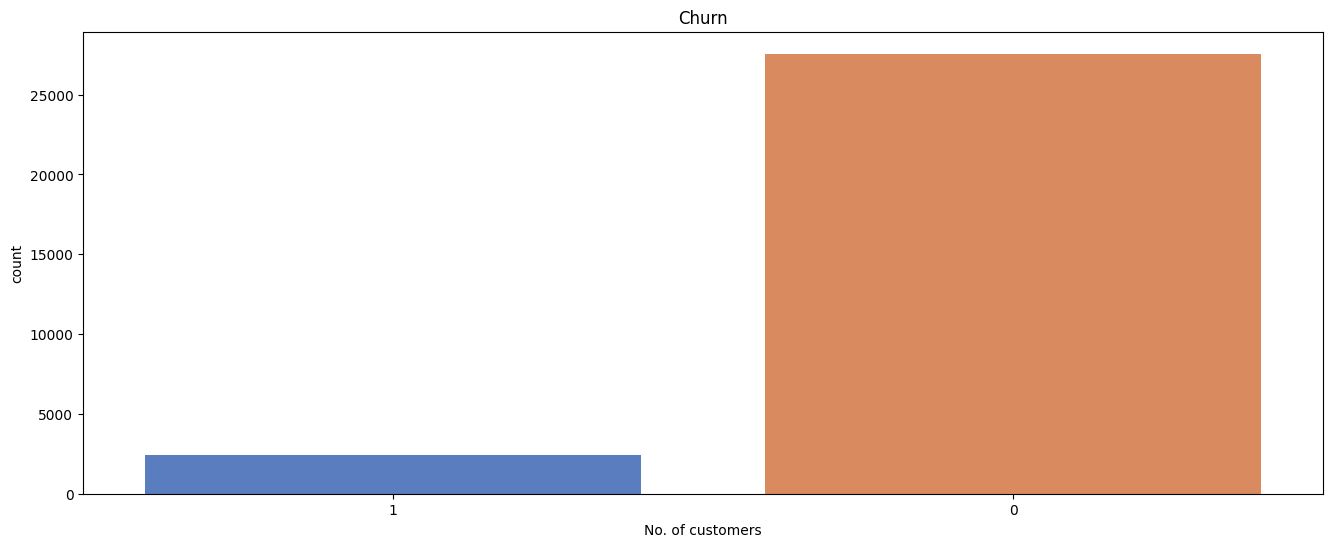

In [43]:
plt.rcdefaults()
plt.figure(figsize=(16, 6))

plt.subplot(1, 1, 1)
# plot_quant(telecom_data_high_value, 'churn',"Distribution of Customers")
plot_cat(telecom_data_high_value, 'churn',title="Churn",ylabel="No. of customers")

plt.show()

### 2.1.2 Nominal Variables

We are going to analyse the following categorical variables fb_user.

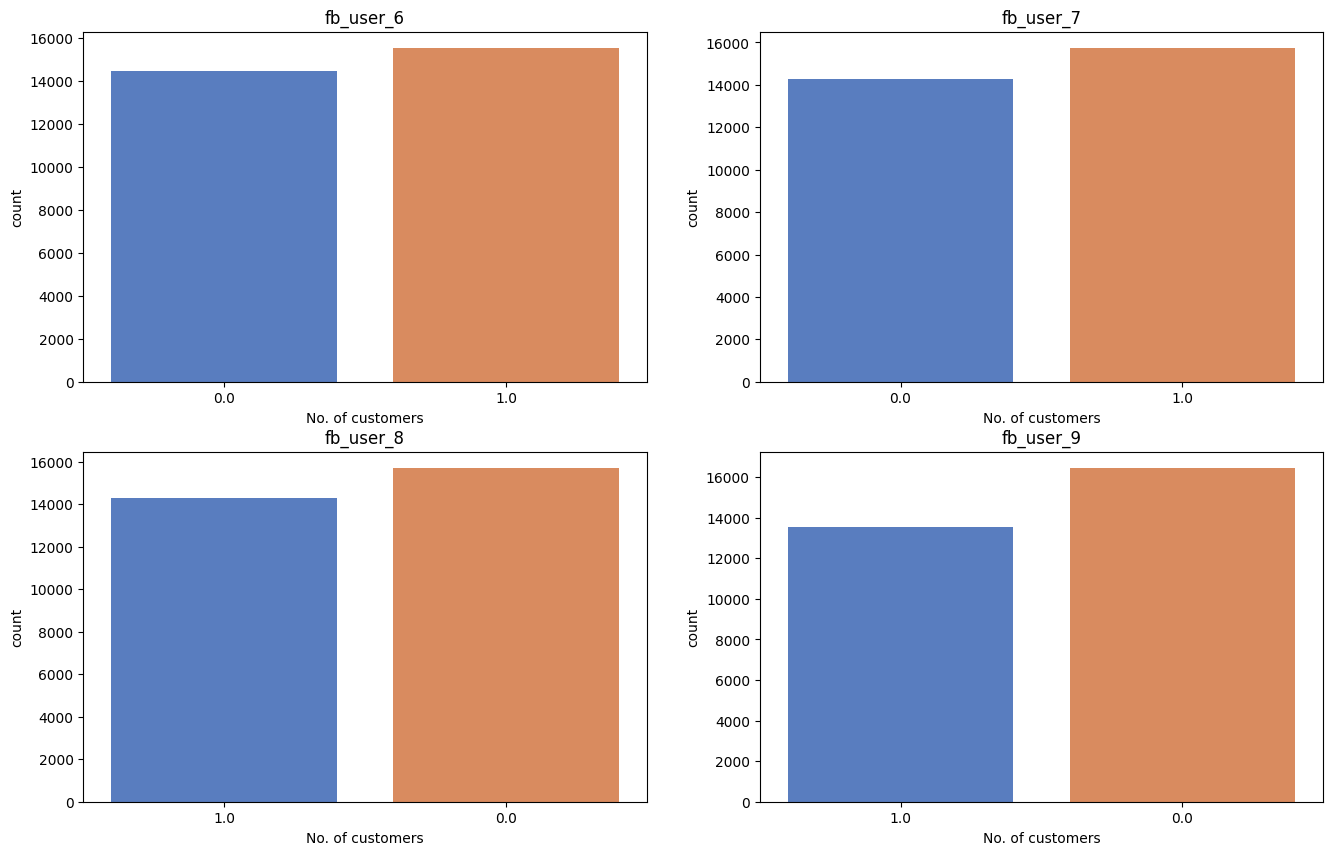

In [44]:
plt.rcdefaults()
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plot_cat(telecom_data_high_value, 'fb_user_6',title="fb_user_6",ylabel="No. of customers")

plt.subplot(2, 2, 2)
plot_cat(telecom_data_high_value, 'fb_user_7',title="fb_user_7",ylabel="No. of customers")

plt.subplot(2, 2, 3)
plot_cat(telecom_data_high_value, 'fb_user_8',title="fb_user_8",ylabel="No. of customers")

plt.subplot(2, 2, 4)
plot_cat(telecom_data_high_value, 'fb_user_9',title="fb_user_9",ylabel="No. of customers")

plt.show()

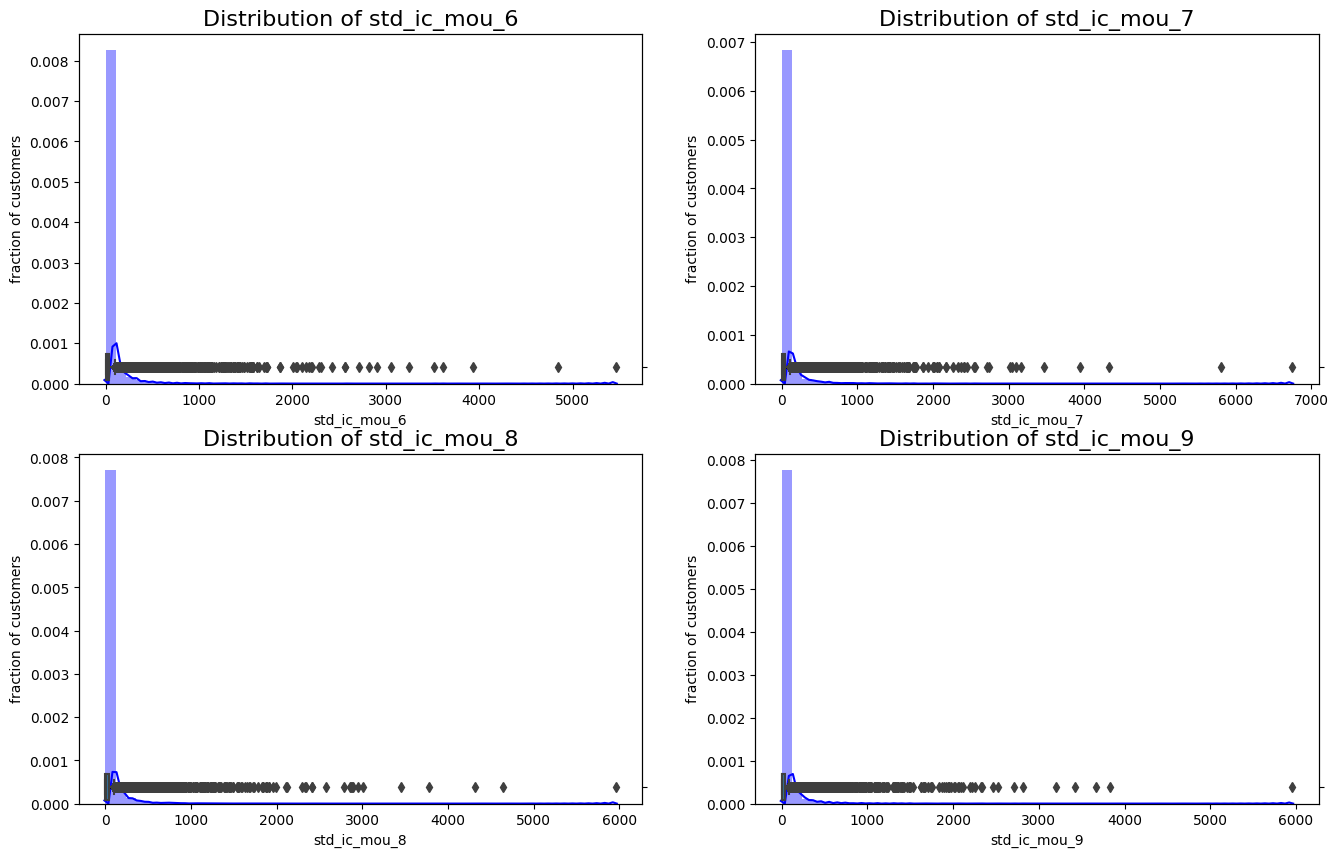

In [45]:
plt.rcdefaults()
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plot_quant(telecom_data_high_value, 'std_ic_mou_6',"Distribution of std_ic_mou_6")

plt.subplot(2, 2, 2)
plot_quant(telecom_data_high_value, 'std_ic_mou_7',"Distribution of std_ic_mou_7")

plt.subplot(2, 2, 3)
plot_quant(telecom_data_high_value, 'std_ic_mou_8',"Distribution of std_ic_mou_8")

plt.subplot(2, 2, 4)
plot_quant(telecom_data_high_value, 'std_ic_mou_9',"Distribution of std_ic_mou_9")

plt.show()

### 2.1.3 Quantitative Variables

We are going to analyse the following quantitative variables 'std_ic_mou'

### AON : Age on Network

count   30001.00
mean     1209.37
std       957.68
min       180.00
25%       460.00
50%       846.00
75%      1756.00
max      4321.00
Name: aon, dtype: float64


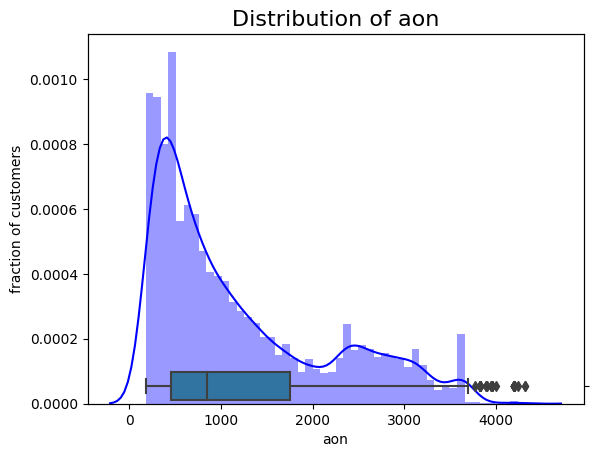

In [46]:
# Customers distribution of the age on network
print(telecom_data_high_value.aon.describe())
plot_quant(telecom_data_high_value, 'aon',"Distribution of aon")

count   30001.00
mean     1209.37
std       957.68
min       180.00
25%       460.00
50%       846.00
75%      1756.00
max      4321.00
Name: aon, dtype: float64


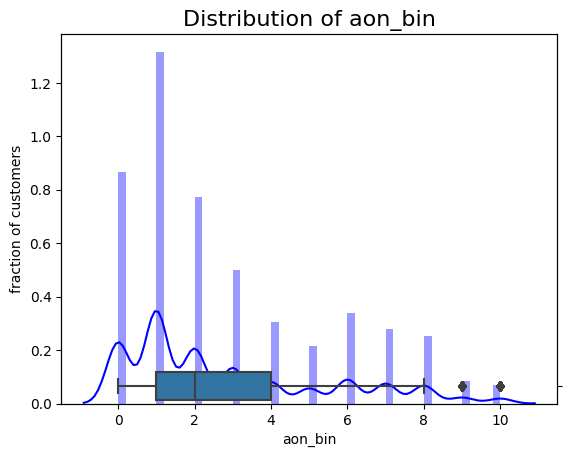

In [47]:
#Create Derived categorical variable
telecom_data_high_value['aon_bin'] = pd.cut(telecom_data['aon'], range(0,telecom_data['aon'].max(),365), labels=range(0,int(round(telecom_data['aon'].max()/365))-1))

# Customers distribution of the age on network
print(telecom_data_high_value.aon.describe())
plot_quant(telecom_data_high_value, 'aon_bin',"Distribution of aon_bin")

#### Observations
1. Most of the people in the network have aon between 1-3 years.

### 2.2 Segmented Univariate Analysis

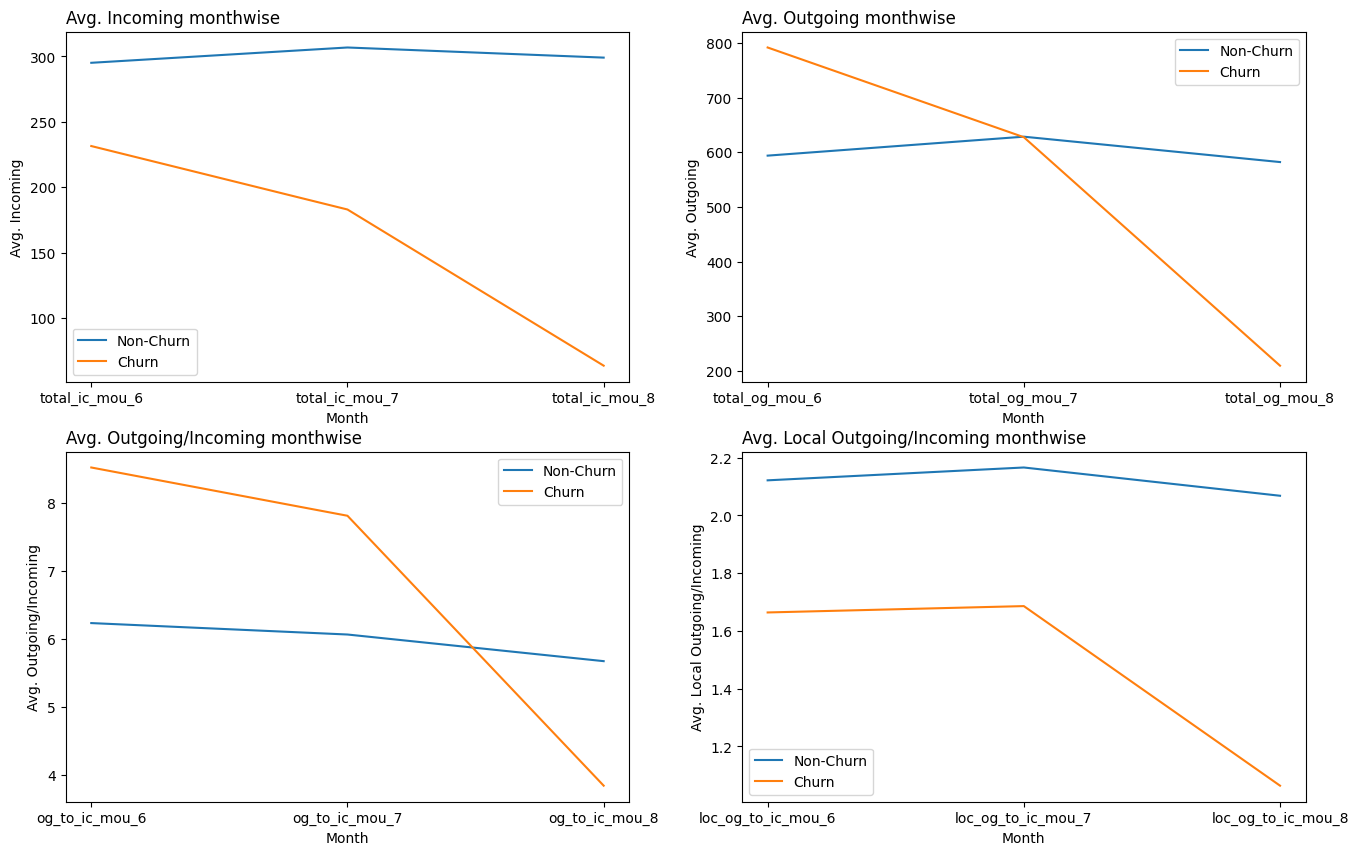

In [48]:
incoming_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
outgoing_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
out_to_in = ['og_to_ic_mou_6','og_to_ic_mou_7','og_to_ic_mou_8']
local_out_to_in = ['loc_og_to_ic_mou_6','loc_og_to_ic_mou_7','loc_og_to_ic_mou_8']

plt.rcdefaults()
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plot_target_feature(telecom_data_high_value, 'churn' ,incoming_col, "Avg. Incoming monthwise", "Avg. Incoming")
plt.subplot(2,2,2)
plot_target_feature(telecom_data_high_value, 'churn' ,outgoing_col, "Avg. Outgoing monthwise", "Avg. Outgoing")

## Highly correlated
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    telecom_data_high_value['og_to_ic_mou_'+str(i)] = (telecom_data_high_value['total_og_mou_'+str(i)])/(telecom_data_high_value['total_ic_mou_'+str(i)]+1)
    
plt.subplot(2,2,3)
plot_target_feature(telecom_data_high_value, 'churn' ,out_to_in, "Avg. Outgoing/Incoming monthwise", "Avg. Outgoing/Incoming")

#Create new feature: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    telecom_data_high_value['loc_og_to_ic_mou_'+str(i)] = (telecom_data_high_value['loc_og_mou_'+str(i)])/(telecom_data_high_value['loc_ic_mou_'+str(i)]+1)

plt.subplot(2,2,4)
plot_target_feature(telecom_data_high_value, 'churn' ,local_out_to_in, "Avg. Local Outgoing/Incoming monthwise", "Avg. Local Outgoing/Incoming")


#### Observations
We can see for churn members there is a clear pattern across all features.
1. The Average incoming units drop month on month.
2. The Average outgoing units drop month on month.
3. The Average local outgoing/incoming units drop month on month.

Whereas for the Non churns no such drastic drop can be seen.

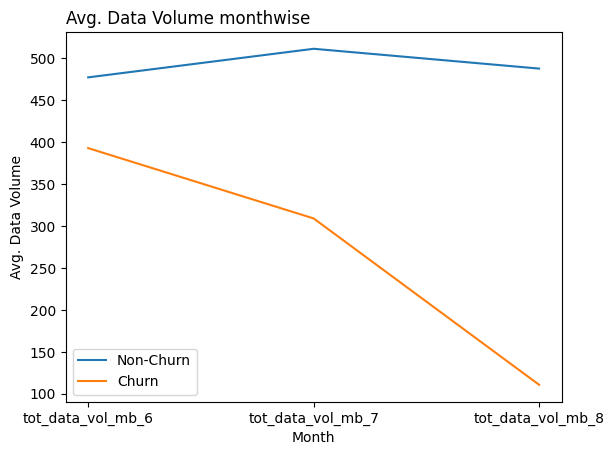

In [49]:
###### Total data volume VS Churn 
vol_data_mb_col = ['tot_data_vol_mb_6','tot_data_vol_mb_7','tot_data_vol_mb_8']


plot_target_feature(telecom_data_high_value, 'churn' ,vol_data_mb_col, "Avg. Data Volume monthwise", "Avg. Data Volume")

#### Observations
We can see for churn members there is a clear drop in the data volume used. Whereas for the Non churns no such drastic drop can be seen.

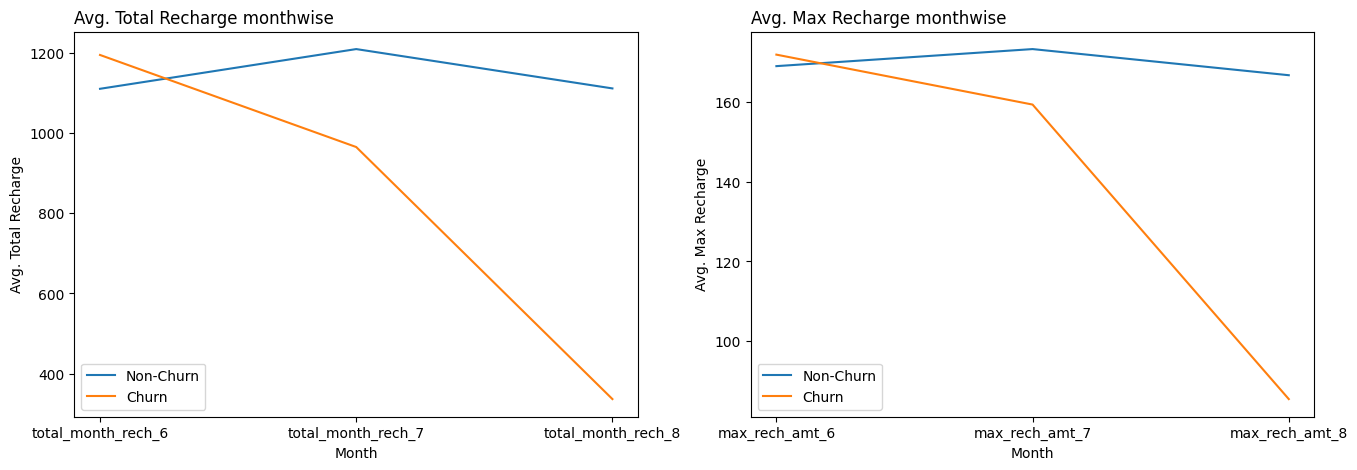

In [50]:
###### Total data volume VS Churn 
total_month_rech_col  = ['total_month_rech_6','total_month_rech_7','total_month_rech_8']
max_rech_amt_col  = ['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']

plt.rcdefaults()
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plot_target_feature(telecom_data_high_value, 'churn' ,total_month_rech_col, "Avg. Total Recharge monthwise", "Avg. Total Recharge")

plt.subplot(1,2,2)
plot_target_feature(telecom_data_high_value, 'churn' ,max_rech_amt_col, "Avg. Max Recharge monthwise", "Avg. Max Recharge")



#### Observations
We can see for churn members there is a clear drop in the amount of recharge they are doing in the prepaid phone, as opposed to the non-churn members.

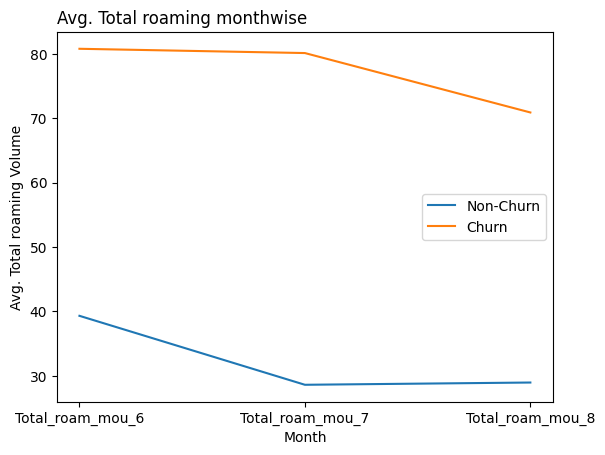

In [51]:
#Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
for i in range(6,9):
    telecom_data_high_value['Total_roam_mou_'+str(i)] = (telecom_data_high_value['roam_ic_mou_'+str(i)])+(telecom_data_high_value['roam_og_mou_'+str(i)])
    

Total_roam_mou_col = ['Total_roam_mou_6','Total_roam_mou_7','Total_roam_mou_8']


plot_target_feature(telecom_data_high_value, 'churn' ,Total_roam_mou_col, "Avg. Total roaming monthwise", "Avg. Total roaming Volume")

### 2.3 Bivariate Analysis


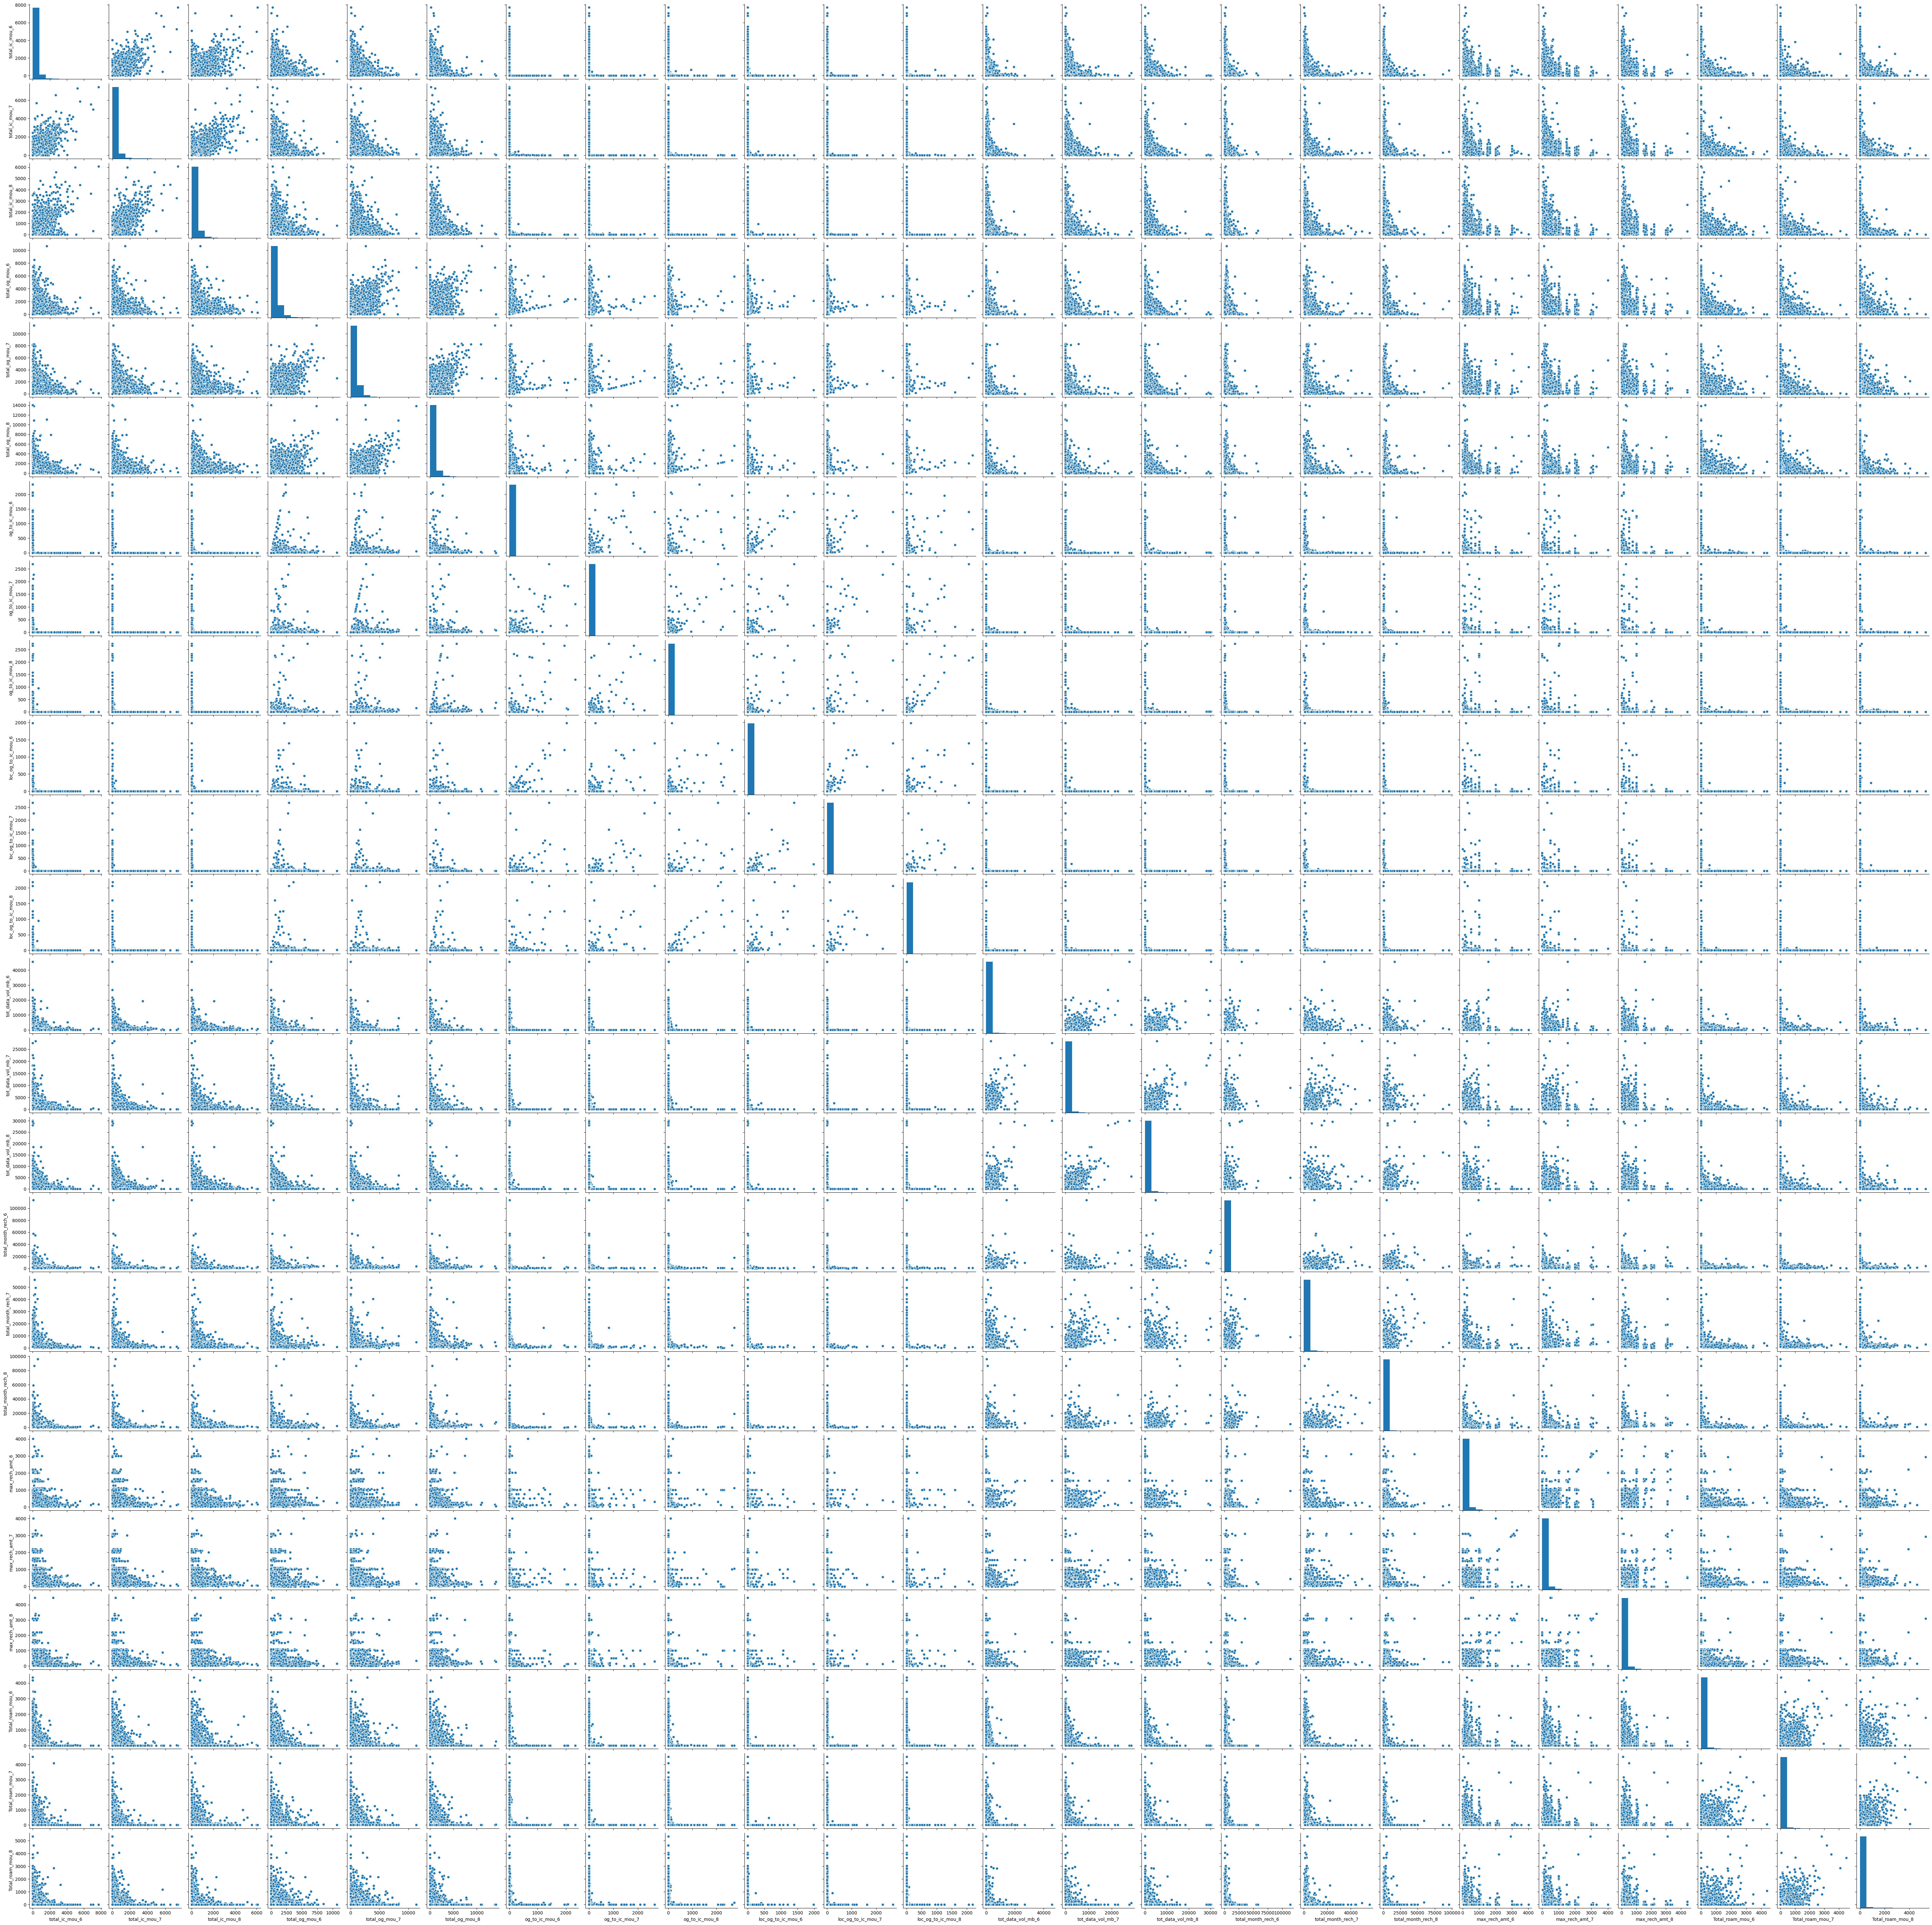

In [52]:
quant_vars = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_og_mou_6','total_og_mou_7',
              'total_og_mou_8','og_to_ic_mou_6','og_to_ic_mou_7','og_to_ic_mou_8','loc_og_to_ic_mou_6',
              'loc_og_to_ic_mou_7','loc_og_to_ic_mou_8','tot_data_vol_mb_6','tot_data_vol_mb_7',
              'tot_data_vol_mb_8','total_month_rech_6','total_month_rech_7','total_month_rech_8',
              'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','Total_roam_mou_6','Total_roam_mou_7','Total_roam_mou_8']


sns.pairplot(telecom_data_high_value[quant_vars])
# In the interest of Space I am only plotting the last 20 variables
# It will take 10-15mins to plot. Please wait.

<AxesSubplot:>

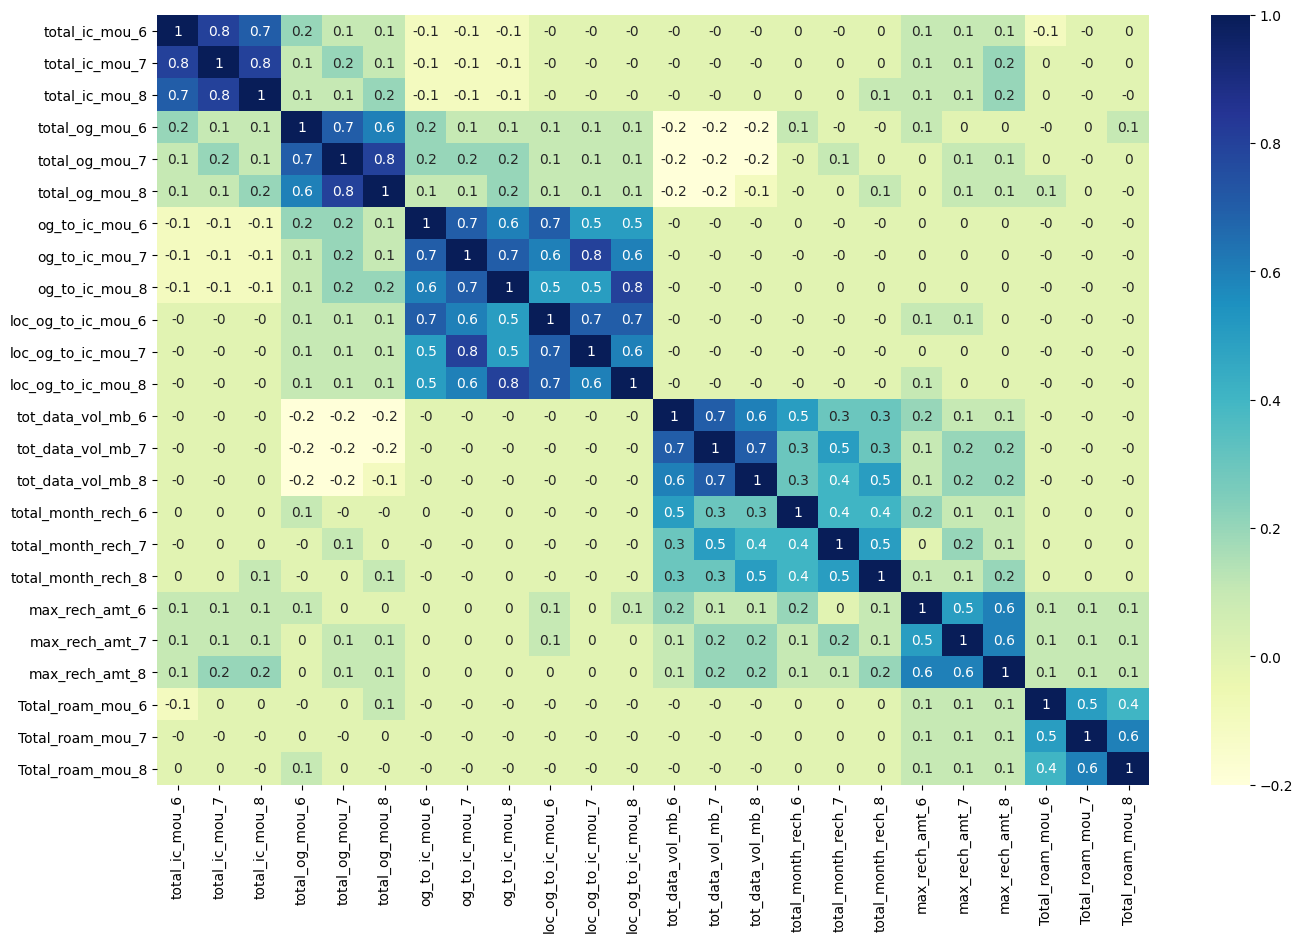

In [53]:
plt.figure(figsize = (16, 10))
sns.heatmap(round(telecom_data_high_value[quant_vars].corr(),1), annot = True, cmap="YlGnBu")

#### Observations
#### Multicollinearity
we can identify pockets of collinearity among similar features,
* *max_rech_amt* has collinearity among _6, _7, _8 features
* *og_to_ic_mou* and *loc_og_to_ic_mou* are correlated to each other.


In [54]:
# Lets remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
col_9List = telecom_data_high_value.filter(regex=('_9')).columns
telecom_data_high_value.drop(col_9List,axis=1,inplace=True)

In [55]:
# Lets remove all the date attributes
dateList = telecom_data_high_value.filter(regex=('date')).columns
dateList
telecom_data_high_value.drop(dateList,axis=1,inplace=True)

In [56]:
data = telecom_data_high_value
print("Data Matrix Shape : {}".format(data.shape))
data.head()

Data Matrix Shape : (30001, 178)


mobile_number  arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753  197.38  214.82  213.80         0.00         0.00   
1     7000701601 1069.18 1349.85 3171.48        57.84        54.68   
2     7001524846  378.72  492.22  137.36       413.69       351.03   
3     7002124215  514.45  597.75  637.76       102.41       132.11   
4     7000887461   74.35  193.90  366.97        48.96        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00          0.00          0.00          0.00           0.00   
1        52.29        453.43        567.16        325.91          16.23   
2        35.08         94.66         80.63        136.48           0.00   
3        85.14        757.93        896.68        983.39           0.00   
4        33.58         85.41         89.36        205.89           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1             53.23              0.00              0.00              0.00   
2              0.00              0.00              0.00              7.15   
3              1.58              0.00              0.00              0.00   
4              0.00              0.00              0.00             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00              0.00   
4             39.61   

In [57]:
telecom_data_high_value.drop(['mobile_number'],axis=1,inplace=True)
telecom_data_high_value.drop(['aon_bin'],axis=1,inplace=True)

In [58]:
getDataMissingValues(telecom_data_high_value,0)

 0 features having more than 0% missing values/entries


Series([], dtype: float64)

In [59]:
print(data.columns)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'churn', 'og_to_ic_mou_6', 'og_to_ic_mou_7', 'og_to_ic_mou_8',
       'loc_og_to_ic_mou_6', 'loc_og_to_ic_mou_7', 'loc_og_to_ic_mou_8',
       'Total_roam_mou_6', 'Total_roam_mou_7', 'Total_roam_mou_8'],
      dtype='object', length=176)


In [60]:
data.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.38  214.82  213.80         0.00         0.00         0.00   
1 1069.18 1349.85 3171.48        57.84        54.68        52.29   
2  378.72  492.22  137.36       413.69       351.03        35.08   
3  514.45  597.75  637.76       102.41       132.11        85.14   
4   74.35  193.90  366.97        48.96        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00           0.00           0.00   
1        453.43        567.16        325.91          16.23          33.49   
2         94.66         80.63        136.48           0.00           0.00   
3        757.93        896.68        983.39           0.00           0.00   
4         85.41         89.36        205.89           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1             53.23              0.00              0.00              0.00   
2              0.00              0.00              0.00              7.15   
3              1.58              0.00              0.00              0.00   
4              0.00              0.00              0.00             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00              0.00   
4             39.61              0.00              0.00              0.00   

   std_og_mou_6  std_og_mou_7  std

# 3. Modelling for Prediction

As there are many classifiers that we learnt during the course and others which are used in the industry, manually trying each on of them is cumbersome to choose. The approach that we are following here is to used a Python Package which fits multiple Classifiers on the dataset after preprocessing.

Based on this, we get the best out-of-the box performing models to chose from. We further take these model and run are experiments in the following order :

1. Modelling with Original Dataset
2. Modelling with PCA
3. Modellig with PCA & Class Balancing

Theoritically, the #3 approach of modelling should give use the best modelling. We would also perform a Hyper-parameter tuning during model to get the based performance from our models.

We would be writing generic functions for the all the modelling,prediction and performance evaluation so that we can reuse them conveniently.

In [61]:
def train_model(model,X_train,y_train,params,folds=5,grid=False):
    
    # Conduct Grid Search with the Model & Parameters space
    if grid :
        clf = GridSearchCV(estimator=model, param_grid= params,return_train_score=True,
                       cv=folds,n_jobs=-1,
                      )
    # Conduct RandomCV Search with n_iter=100( 100 hyperparameter search)
    else :
        clf = RandomizedSearchCV(estimator = model, param_distributions = params, return_train_score=True,
                                n_iter = 100, cv = folds,random_state=42, n_jobs = -1)
    
    clf.fit(X_train,y_train)

    return clf

    
def compute_metrics(model,X,y,model_name,display=True,train_threshold=None):
    """
    Function to compute Evaluation metrics for Training & Test Set.
    Optimal Threshold is selected based on training data and used for test data
    """
    
    # Default model predict
    y_pred = model.predict(X)
    # Predict Probabilty for Positive(Churn) Label
    y_pred_proba = model.predict_proba(X)[:,1]
    
    roc_auc = roc_auc_score(y, y_pred_proba)
    precision, recall, pr_thresholds = precision_recall_curve(y, y_pred_proba)
    p, r, thresholds = precision_recall_curve(y, y_pred_proba)
    if train_threshold :
        plt.title("Test P-R Curve")
    else :
        plt.title("Training P-R Curve")
    plt.plot(thresholds, p[:-1], "g-",label='precision')
    plt.plot(thresholds, r[:-1], "r-",label='recall')
    plt.legend(loc="lower right")
    plt.show()
    
    # Calcualte F1-Sore &  find the Threshold
    fscore = 2 * (precision * recall) / (precision + recall)
    # Finding best threshold to maximise F1-Score
    optimal_idx = np.argmax(fscore)
    
    # Set Optimal Threshold based on training/test set
    if train_threshold is None :
        optimal_threshold = pr_thresholds[optimal_idx]
    else :
        optimal_threshold = train_threshold
   
    
    # Classify based on Threshold
    y_pred_proba = np.where(y_pred_proba>=optimal_threshold, 1, y_pred_proba)
    y_pred_proba = np.where(y_pred_proba<optimal_threshold, 0, y_pred_proba)

    
    accuracy = accuracy_score(y, y_pred_proba, normalize=True)
    b_accuracy = balanced_accuracy_score(y, y_pred_proba)
    f1 = f1_score(y, y_pred_proba, average="micro")
    f1_weighted = f1_score(y, y_pred_proba, average="weighted")
    recall = recall_score(y,y_pred_proba)
    
    if display :
        print("Model Accuracy : {}".format(accuracy))
        print("Balanced Model Accuracy : {}".format(b_accuracy))
        print("AUC the ROC : {}".format(roc_auc))
        print("Recall for Churn Customers: {}".format(roc_auc))
        print("F1 - Score : {}".format(f1))
        print("F1 Weighted- Score : {}".format(f1_weighted))
        print("Optimal Threshold : {}".format(optimal_threshold))

    row = { "model_name" : model_name,
            "accuracy" : accuracy,
            "balanced_accuracy" : b_accuracy,
            "auc_roc" : roc_auc,
            "recall" : recall, 
            "f1" : f1,
            "f1_weighted" : f1_weighted,
            "threshold" : optimal_threshold}
    
    return row

# Modeling on Constructed Dataset

1. Divide Train/Test Split
2. Check over 30 Classifiers to chose the ones to model with
3. Scale the data on training set : Min-Max Scaling
4. Modelling 

In [62]:
# Create Dependent & Independent Variables
y= data.pop("churn")
X = data

# Split Dataset in Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)

# Run a family of Classifier Algorithms to evaluature which models to select for modelling
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 30/30 [05:20<00:00, 10.70s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      0.92               0.78     0.78      0.92   
BernoulliNB                        0.75               0.77     0.77      0.81   
LGBMClassifier                     0.94               0.76     0.76      0.94   
XGBClassifier                      0.94               0.75     0.75      0.94   
NearestCentroid                    0.71               0.75     0.75      0.77   
AdaBoostClassifier                 0.94               0.74     0.74      0.94   
RandomForestClassifier             0.94               0.73     0.73      0.94   
QuadraticDiscriminantAnalysis      0.68               0.73     0.73      0.75   
BaggingClassifier                  0.94               0.72     0.72      0.93   
DecisionTreeClassifier             0.91               0.71     0.71      0.91   
ExtraTreesClassifier               0.94               0.70     0.70      0.93   
GaussianNB                         0.55               0.69     0.69      0.64   
ExtraTreeClassifier                0.90               0.68     0.68      0.90   
LogisticRegression                 0.93               0.66     0.66      0.92   
LinearDiscriminantAnalysis         0.92               0.62     0.62      0.91   
LabelSpreading                     0.90               0.62     0.62      0.89   
LabelPropagation                   0.90               0.62     0.62      0.89   
KNeighborsClassifier               0.92               0.61     0.61      0.91   
CalibratedClassifierCV             0.92               0.59     0.59      0.91   
SVC                                0.93               0.58     0.58      0.90   
LinearSVC                          0.92               0.58     0.58      0.90   
PassiveAggressiveClassifier        0.91               0.57     0.57      0.89   
Perceptron                         0.90               0.56     0.56      0.89   
RidgeClassifierCV                  0.92               0.51     0.51      0.88   
RidgeClassifier                    0.92               0.51     0.51      0.88   
CheckingClassifier                 0.92               0.50     0.50      0.88   
DummyClassifier                    0.85               0.49     0.49      0.85   

                               Time Taken  
Model                                      
SGDClassifier                        0.87  
BernoulliNB                          0.31  
LGBMClassifier                      45.39  
XGBClassifier                       18.79  
NearestCentroid                      0.26  
AdaBoostClassifier                  11.87  
RandomForestClassifier              16.80  
QuadraticDiscriminantAnalysis        0.50  
BaggingClassifier                   31.81  
DecisionTreeClassifier               4.98  
ExtraTreesClassifier                 3.72  
GaussianNB                           0.31  
ExtraTreeClassifier                  0.27  
LogisticRegression                   0.55  
LinearDiscriminantAnalysis           0.81  
LabelSpreading                      24.65  
LabelPropagation                    18.04  
KNeighborsClassifier                47.92  
CalibratedClassifierCV              40.20  
SVC                                 38.26  
LinearSVC                           11.66  
PassiveAggressiveClassifier          0.40  
Perceptron                           0.34  
RidgeClassifierCV                    0.71  
RidgeClassifier                      0.42  
CheckingClassifier                   0.23  
DummyClassifier                      0.24

In [63]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
scaler = MinMaxScaler()

# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)

# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

## [Model 1] Logistic Regression

In [64]:
lr_m1 = LogisticRegression(random_state=42)
params = {'penalty' : ['l1', 'l2'],
          'class_weight' : ['balanced',None],
          'C' : np.logspace(-4, 4, 20),
          'solver' : ['liblinear','saga','lbfgs']
         }
    
lr_m1 = train_model(lr_m1,X_train,y_train,params)

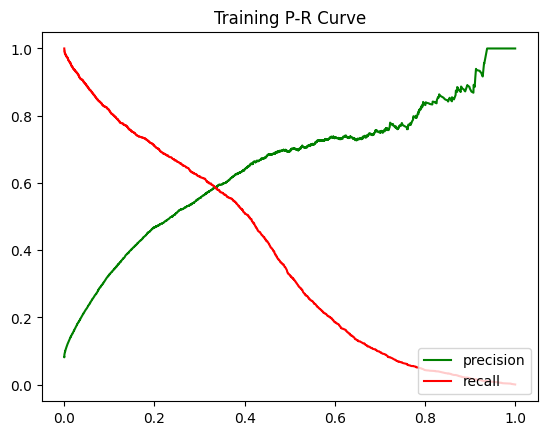

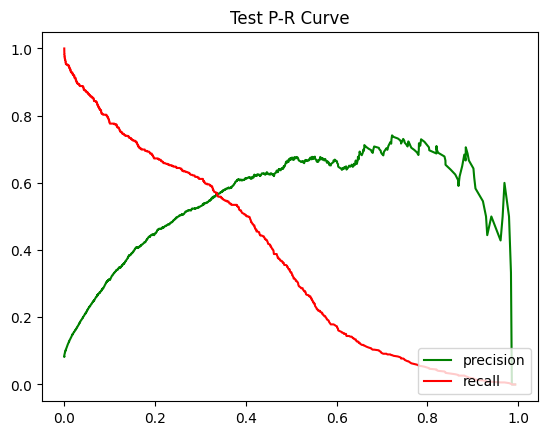

Model Accuracy : 0.9256790534910848
Balanced Model Accuracy : 0.7762718655503854
AUC the ROC : 0.8802015770203082
Recall for Churn Customers: 0.8802015770203082
F1 - Score : 0.9256790534910848
F1 Weighted- Score : 0.9273065775443081
Optimal Threshold : 0.31376819543344536


LogisticRegression(C=206.913808111479, penalty='l1', random_state=42,
                   solver='liblinear')

In [65]:
row_m1_train = compute_metrics(lr_m1,X_train,y_train,"m1 LR",display=False)
row_m1_test = compute_metrics(lr_m1,X_test,y_test,"m1 LR",train_threshold = row_m1_train["threshold"] )
# Best Model
lr_m1.best_estimator_

## [Model 2] Random Forest

In [66]:
rf_m2 = RandomForestClassifier(random_state=42)
params = {
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]
         }
    
rf_m2 = train_model(rf_m2,X_train,y_train,params)

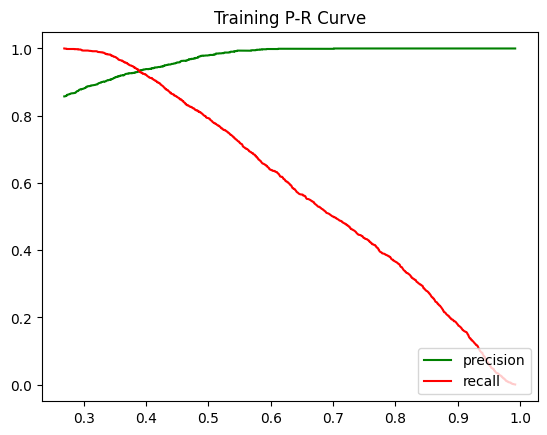

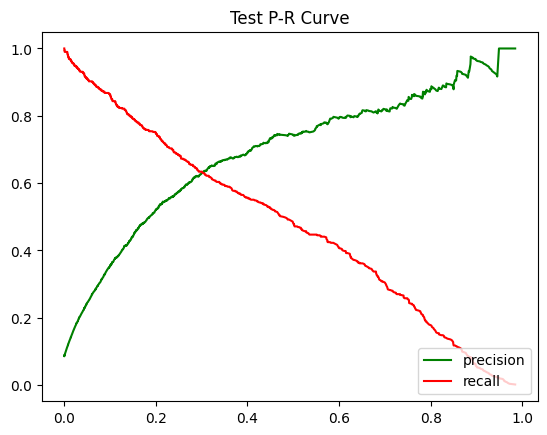

Model Accuracy : 0.942676220629895
Balanced Model Accuracy : 0.783678444880292
AUC the ROC : 0.9238520632165842
Recall for Churn Customers: 0.9238520632165842
F1 - Score : 0.942676220629895
F1 Weighted- Score : 0.9410915638622472
Optimal Threshold : 0.35037937177138145


RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=200,
                       random_state=42)

In [67]:
row_m2_train = compute_metrics(rf_m2,X_train,y_train,"m2 RF",display=False)
row_m2_test = compute_metrics(rf_m2,X_test,y_test,"m2 RF",train_threshold = row_m2_train["threshold"])
# Best Model
rf_m2.best_estimator_

# Modeling with PCA

We use PCA to reduce the parameter space while trying to retain the maximum variance. 

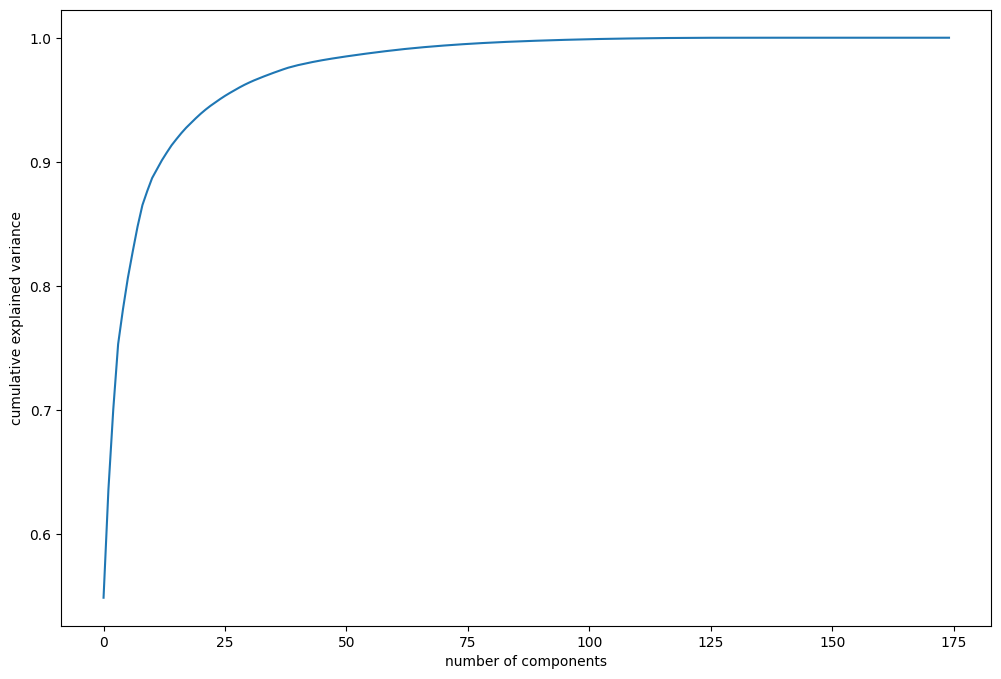

In [68]:
# Initialize PCA
pca = PCA(svd_solver='randomized', random_state=42)

#Doing the PCA on the train data
pca.fit(X_train)

#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


From the plot we can see that we 90% of the variance is captured by approx ~15 Components while we reach >95% variance with ~30 Components.

Let's see the variance caputured by 50 Components

In [69]:
print("Variance Capture by 0 Principal Components : {}".format(pca.explained_variance_ratio_[:50].sum()))
pca.explained_variance_ratio_[:50]

Variance Capture by 0 Principal Components : 0.9844078110733097


array([0.54908815, 0.08694833, 0.06468298, 0.05258508, 0.02815511,
       0.02504962, 0.02121363, 0.02020976, 0.01728364, 0.01139958,
       0.01041978, 0.0071382 , 0.007088  , 0.00620149, 0.00591245,
       0.00498519, 0.00478366, 0.0043686 , 0.00386128, 0.00383238,
       0.00360297, 0.00331009, 0.00303041, 0.00278639, 0.00269366,
       0.00256582, 0.00236405, 0.00225487, 0.00220472, 0.00205432,
       0.0018705 , 0.00174446, 0.00158553, 0.00156268, 0.00149346,
       0.00145221, 0.00141158, 0.00136502, 0.00128912, 0.00103181,
       0.00102627, 0.00085349, 0.00084244, 0.0008234 , 0.00077141,
       0.0006917 , 0.00069085, 0.00061662, 0.00061238, 0.00059866])

In [70]:
# We create 50 components to capture ~98 variance in the data
pca = PCA(n_components = 50,svd_solver='randomized', random_state=42)

# Fit & Transform Training Dataset
X_train_pca = pca.fit_transform(X_train)

# Transform Test Set
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(6001, 50)

## [Model-3]  Logistic Regression with PCA

In [71]:
lr_m3 = LogisticRegression(random_state=42)
params = {'penalty' : ['l1', 'l2'],
          'class_weight' : ['balanced',None],
          'C' : np.logspace(-4, 4, 20),
          'solver' : ['liblinear','saga','lbfgs']
         }
    
lr_m3 = train_model(lr_m3,X_train_pca,y_train,params)

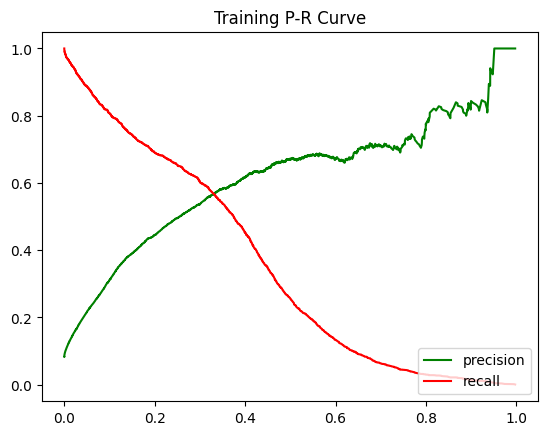

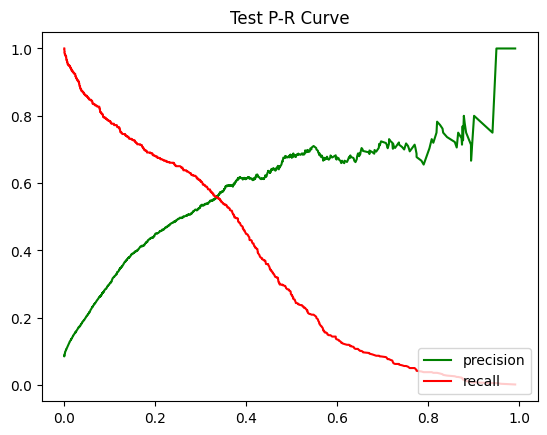

Model Accuracy : 0.9221796367272121
Balanced Model Accuracy : 0.7817698902166004
AUC the ROC : 0.8806535351612366
Recall for Churn Customers: 0.8806535351612366
F1 - Score : 0.9221796367272121
F1 Weighted- Score : 0.9250307210401716
Optimal Threshold : 0.2932032139620577


LogisticRegression(C=545.5594781168514, random_state=42, solver='liblinear')

In [72]:
row_m3_train = compute_metrics(lr_m3,X_train_pca,y_train,"m3 LR + PCA",display=False)
row_m3_test = compute_metrics(lr_m3,X_test_pca,y_test,"m3 LR + PCA",train_threshold = row_m3_train["threshold"])

# Best Model
lr_m3.best_estimator_

## [Model-4]  Random Forest with PCA

In [73]:
rf_m4 = RandomForestClassifier(random_state=42)
params = {
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]
         }
    
rf_m4 = train_model(rf_m4,X_train_pca,y_train,params)

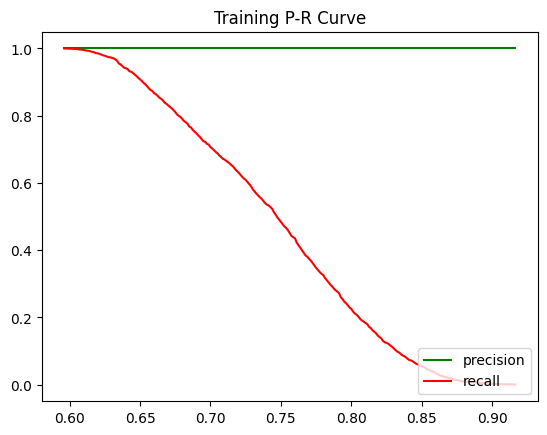

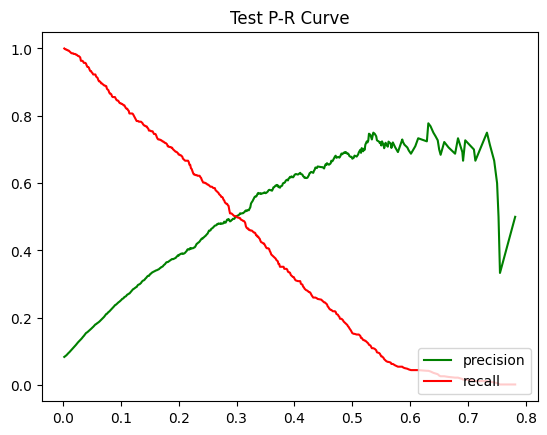

Model Accuracy : 0.9201799700049992
Balanced Model Accuracy : 0.5224663780037692
AUC the ROC : 0.8887649847182806
Recall for Churn Customers: 0.8887649847182806
F1 - Score : 0.9201799700049992
F1 Weighted- Score : 0.8868833364443865
Optimal Threshold : 0.59625


RandomForestClassifier(max_features='sqrt', n_estimators=800, random_state=42)

In [74]:
row_m4_train = compute_metrics(rf_m4,X_train_pca,y_train,"m4 RF + PCA",display=False)
row_m4_test = compute_metrics(rf_m4,X_test_pca,y_test,"m4 RF + PCA",train_threshold = row_m4_train["threshold"])

# Best Model
rf_m4.best_estimator_

# Modelling with Class Imbalance

Since we have very few positive(churn) examples, it becomes hard to train ML models . We try to balance the training data via various means. Here we use SMOTE to increase number of Positive Examples in the dataset artificially.

In [75]:
from imblearn.over_sampling import SMOTE

# Balance Data to 50 %
sm = SMOTE(random_state=42)
X_train_bal_50, y_train_bal_50 = sm.fit_sample(X_train, y_train)

# Balance Data to 25 %
sm = SMOTE(0.35,random_state=42)
X_train_bal_25, y_train_bal_25 = sm.fit_sample(X_train, y_train)

In [76]:
############## Orginal Dataset Stats #####################
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

############## 50% Oversampled Dataset Stats #####################
print('After OverSampling 50%, the shape of train_X: {}'.format(X_train_bal_50.shape))
print('After OverSampling 50%, the shape of train_y: {} \n'.format(y_train_bal_50.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_bal_50==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_bal_50==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_bal_50==1)/len(y_train_bal_50)*100,2)))

############## 25% Oversampled Dataset Stats #####################
print('After OverSampling 25%, the shape of train_X: {}'.format(X_train_bal_25.shape))
print('After OverSampling 25%, the shape of train_y: {} \n'.format(y_train_bal_25.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_bal_25==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_bal_25==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_bal_25==1)/len(y_train_bal_25)*100,2)))

Before OverSampling, counts of label '1': 1949
Before OverSampling, counts of label '0': 22051 

Before OverSampling, churn event rate : 8.12% 

After OverSampling 50%, the shape of train_X: (44102, 175)
After OverSampling 50%, the shape of train_y: (44102,) 

After OverSampling, counts of label '1': 22051
After OverSampling, counts of label '0': 22051
After OverSampling, churn event rate : 50.0% 

After OverSampling 25%, the shape of train_X: (29768, 175)
After OverSampling 25%, the shape of train_y: (29768,) 

After OverSampling, counts of label '1': 7717
After OverSampling, counts of label '0': 22051
After OverSampling, churn event rate : 25.92% 



## [Model -5] Logistic with Imbalance(50-50)

In [77]:
lr_m5 = LogisticRegression(random_state=42)
params = {'penalty' : ['l1', 'l2'],
          'class_weight' : ['balanced',None],
          'C' : np.logspace(-4, 4, 20),
          'solver' : ['liblinear','saga','lbfgs']
         }
    
lr_m5 = train_model(lr_m5,X_train_bal_50,y_train_bal_50,params)

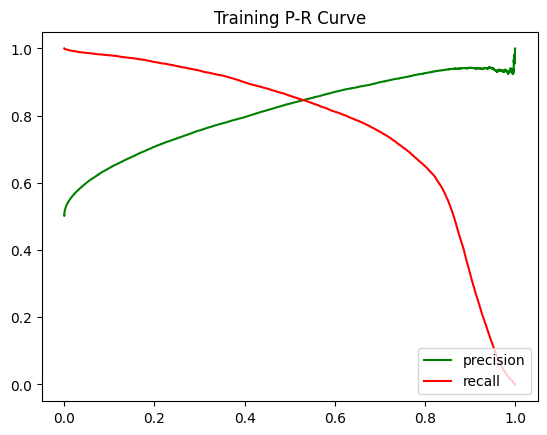

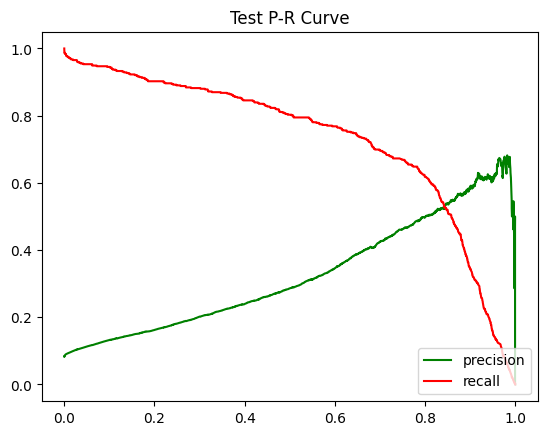

Model Accuracy : 0.8145309115147475
Balanced Model Accuracy : 0.8119865202100922
AUC the ROC : 0.8770836192660346
Recall for Churn Customers: 0.8770836192660346
F1 - Score : 0.8145309115147474
F1 Weighted- Score : 0.8509662403699889
Optimal Threshold : 0.4877359291629379


LogisticRegression(C=29.763514416313132, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

In [78]:
row_m5_train = compute_metrics(lr_m5,X_train_bal_50,y_train_bal_50,"m5 LR + SMOTE-50",display=False)
row_m5_test = compute_metrics(lr_m5,X_test,y_test,"m5 LR + SMOTE-50",train_threshold = row_m5_train["threshold"])

# Best Model
lr_m5.best_estimator_

## [Model 6] Logistic Regression with Imbalance(25-75)

In [79]:
lr_m6 = LogisticRegression(random_state=42)
params = {'penalty' : ['l1', 'l2'],
          'class_weight' : ['balanced',None],
          'C' : np.logspace(-4, 4, 20),
          'solver' : ['liblinear','saga','lbfgs']
         }
    
lr_m6 = train_model(lr_m6,X_train_bal_25,y_train_bal_25,params)

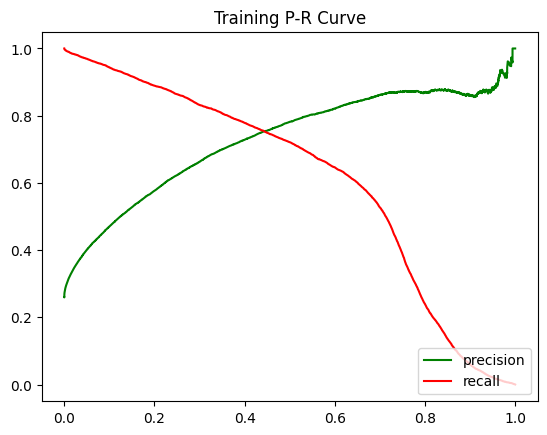

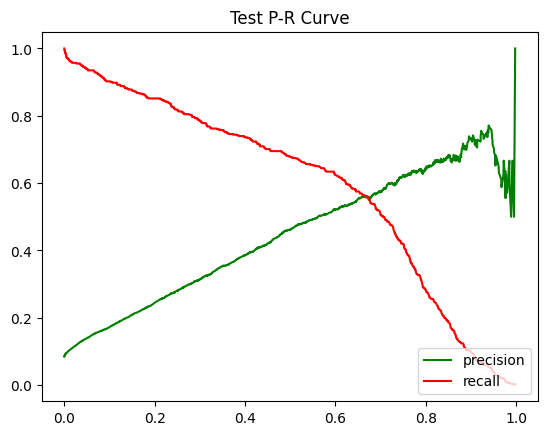

Model Accuracy : 0.8923512747875354
Balanced Model Accuracy : 0.8117987269907188
AUC the ROC : 0.8841371178278854
Recall for Churn Customers: 0.8841371178278854
F1 - Score : 0.8923512747875354
F1 Weighted- Score : 0.9050942661835187
Optimal Threshold : 0.4321659382335508


LogisticRegression(C=1.623776739188721, penalty='l1', random_state=42,
                   solver='liblinear')

In [80]:
row_m6_train = compute_metrics(lr_m6,X_train_bal_25,y_train_bal_25,"m6 LR + SMOTE-25",display=False)
row_m6_test = compute_metrics(lr_m6,X_test,y_test,"m6 LR + SMOTE-25",train_threshold = row_m6_train["threshold"])

# Best Model
lr_m6.best_estimator_

## [Model 7] Logistic Regression with PCA & Imbalance Handeling

In [81]:
# Balance Data to 25 %
sm = SMOTE(0.35,random_state=42)
X_train_pca_bal, y_train_pca_bal = sm.fit_sample(X_train_pca, y_train)

In [82]:
lr_m7 = LogisticRegression(random_state=42)
params = {'penalty' : ['l1', 'l2'],
          'class_weight' : ['balanced',None],
          'C' : np.logspace(-4, 4, 20),
          'solver' : ['liblinear','saga','lbfgs']
         }
    
lr_m7 = train_model(lr_m7,X_train_pca_bal,y_train_pca_bal,params)

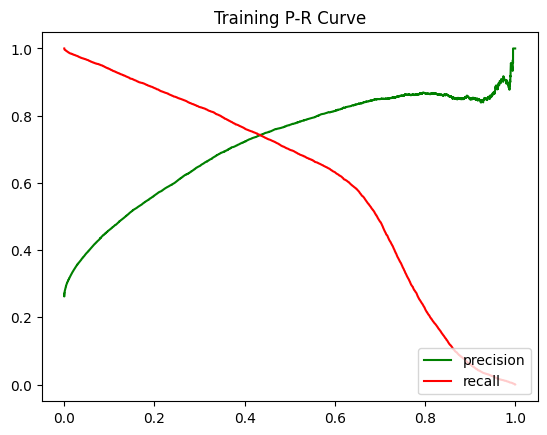

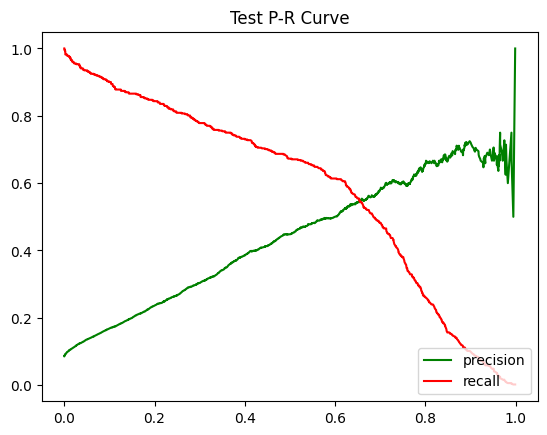

Model Accuracy : 0.8876853857690385
Balanced Model Accuracy : 0.8111084301077173
AUC the ROC : 0.8784929907748885
Recall for Churn Customers: 0.8784929907748885
F1 - Score : 0.8876853857690385
F1 Weighted- Score : 0.9017534630150164
Optimal Threshold : 0.41677823884439774


LogisticRegression(C=78.47599703514607, penalty='l1', random_state=42,
                   solver='saga')

In [83]:
row_m7_train = compute_metrics(lr_m7,X_train_pca_bal,y_train_pca_bal,"m7 LR + PCA + Smote-25",display=False)
row_m7_test = compute_metrics(lr_m7,X_test_pca,y_test,"m7 LR + PCA + Smote-25",train_threshold = row_m7_train["threshold"])

# Best Model
lr_m7.best_estimator_

## [Model 8] Random Forest with Imbalance(50-50)

In [84]:
rf_m8 = RandomForestClassifier(random_state=42)
params = {
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]
         }
    
rf_m8 = train_model(rf_m8,X_train_bal_50,y_train_bal_50,params)

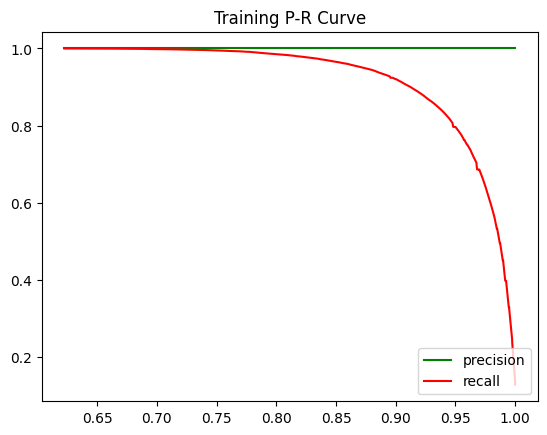

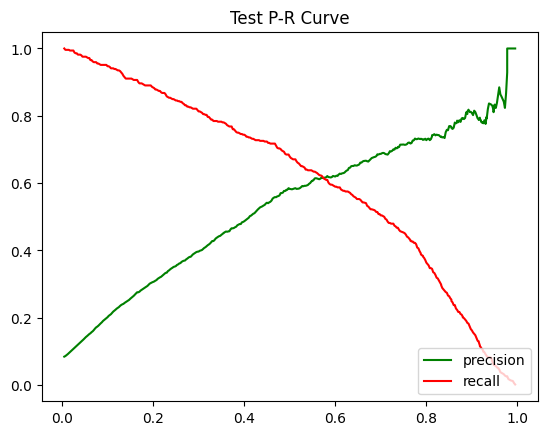

Model Accuracy : 0.9380103316113981
Balanced Model Accuracy : 0.7728076525183476
AUC the ROC : 0.9254914721955352
Recall for Churn Customers: 0.9254914721955352
F1 - Score : 0.9380103316113981
F1 Weighted- Score : 0.9366191940827829
Optimal Threshold : 0.6225


RandomForestClassifier(max_depth=50, max_features='sqrt', n_estimators=400,
                       random_state=42)

In [85]:
row_m8_train = compute_metrics(rf_m8,X_train_bal_50,y_train_bal_50,"m8 RF + SMOTE-50",display=False)
row_m8_test = compute_metrics(rf_m8,X_test,y_test,"m8 RF + SMOTE-50",train_threshold = row_m8_train["threshold"])

# Best Model
rf_m8.best_estimator_

## [Model 9] Random Forest with Imbalance(25-75)

In [86]:
rf_m9 = RandomForestClassifier(random_state=42)
params = {
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]
         }
    
rf_m9 = train_model(rf_m9,X_train_bal_25,y_train_bal_25,params)

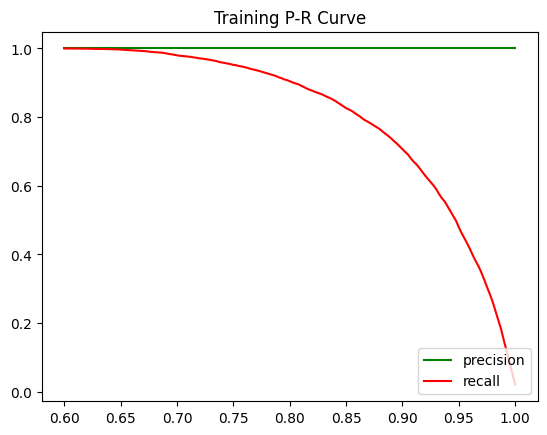

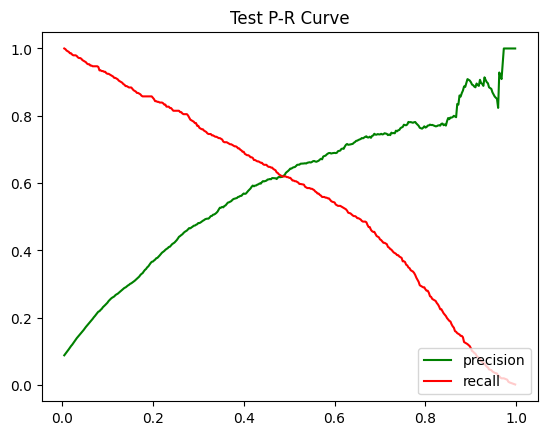

Model Accuracy : 0.9425095817363772
Balanced Model Accuracy : 0.7604501945818152
AUC the ROC : 0.9283736738256836
Recall for Churn Customers: 0.9283736738256836
F1 - Score : 0.9425095817363772
F1 Weighted- Score : 0.9393472055628733
Optimal Threshold : 0.6


RandomForestClassifier(max_depth=50, max_features='sqrt', n_estimators=400,
                       random_state=42)

In [87]:
row_m9_train = compute_metrics(rf_m9,X_train_bal_25,y_train_bal_25,"m9 RF + SMOTE-25",display=False)
row_m9_test = compute_metrics(rf_m9,X_test,y_test,"m9 RF + SMOTE-25",train_threshold = row_m9_train["threshold"])

# Best Model
rf_m9.best_estimator_

## [Model 10] Random Forest with PCA & Imbalance Handeling

In [88]:
rf_m10 = RandomForestClassifier(random_state=42)
params = {
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]
         } 
    
rf_m10 = train_model(rf_m10,X_train_pca_bal,y_train_pca_bal,params)

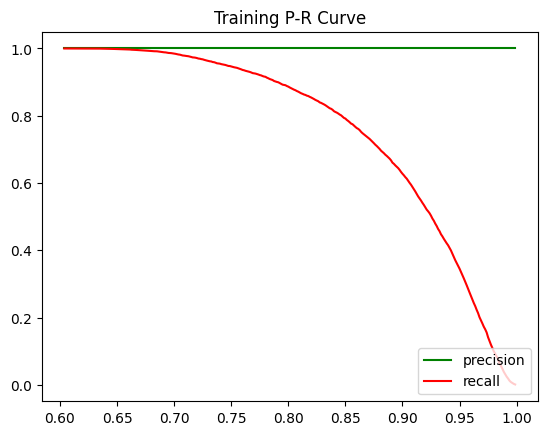

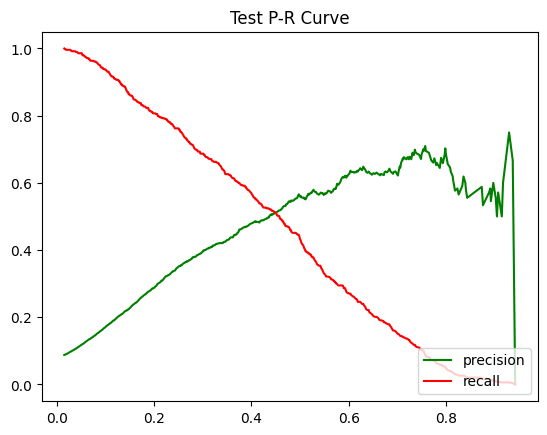

Model Accuracy : 0.92751208131978
Balanced Model Accuracy : 0.6282647980318975
AUC the ROC : 0.8920436182034719
Recall for Churn Customers: 0.8920436182034719
F1 - Score : 0.9275120813197799
F1 Weighted- Score : 0.9137876915818259
Optimal Threshold : 0.60375


RandomForestClassifier(max_features='sqrt', n_estimators=800, random_state=42)

In [89]:
row_m10_train = compute_metrics(rf_m10,X_train_pca_bal,y_train_bal_25,"m10 RF + PCA + Smote-25",display=False)
row_m10_test = compute_metrics(rf_m10,X_test_pca,y_test,"m10 RF + PCA + Smote-25",train_threshold = row_m10_train["threshold"])

# Best Model
rf_m10.best_estimator_

# 4. Evaluation & Model Selection

In the previous step we created multiple models based on various techniques like PCA, SMOTE, while performing hyperparameter tuning and cross validation.

Now we would look at the evaluation performances on both training & test datasets to select the best model.
We evaluated the model for the following :
1. Accuracy : In prediction
2. Balanced Accuracy : In prediction, which gives weights based on the class imbalance.
3. AUC (ROC) : Area under the curve to help us select the best model
4. F1 : F1 score for all the classes.
5. F1 Weighted : F1 score for the whole dataset, giving weights to positive & negative class

In our use-case it can be noted the predicting Churners is more important. Hence we can say increasing **Recall** is important churners. A naive model can predict every user as churner and hence Recall will be 100% . But this would be a poor model and will incur loss to the business. Hence we want our model to have a high-recall and good-precision as well in it's prediction.

Hence we would drive the F1 score as our driving evaluation metric. Also, AUC score will be used to evaluate the differentiating/predictive power of the model. We chose the threshold for classification also in the same fashion, which maximizes our F1 Score at training time.


In [90]:
# Evaluation Results from Test Data for All Models

rows_test = [row_m1_test,row_m2_test,row_m3_test,row_m4_test,row_m5_test,row_m6_test,row_m7_test,
        row_m8_test,row_m9_test,row_m10_test]

results_test = pd.DataFrame(rows_test,columns=["model_name","accuracy","balanced_accuracy","auc_roc",
                                     "recall","f1","f1_weighted","threshold"])
results_test

model_name  accuracy  balanced_accuracy  auc_roc  recall   f1  \
0                    m1 LR      0.93               0.78     0.88    0.60 0.93   
1                    m2 RF      0.94               0.78     0.92    0.59 0.94   
2              m3 LR + PCA      0.92               0.78     0.88    0.61 0.92   
3              m4 RF + PCA      0.92               0.52     0.89    0.05 0.92   
4         m5 LR + SMOTE-50      0.81               0.81     0.88    0.81 0.81   
5         m6 LR + SMOTE-25      0.89               0.81     0.88    0.72 0.89   
6   m7 LR + PCA + Smote-25      0.89               0.81     0.88    0.72 0.89   
7         m8 RF + SMOTE-50      0.94               0.77     0.93    0.58 0.94   
8         m9 RF + SMOTE-25      0.94               0.76     0.93    0.54 0.94   
9  m10 RF + PCA + Smote-25      0.93               0.63     0.89    0.27 0.93   

   f1_weighted  threshold  
0         0.93       0.31  
1         0.94       0.35  
2         0.93       0.29  
3         0.89       0.60  
4         0.85       0.49  
5         0.91       0.43  
6         0.90       0.42  
7         0.94       0.62  
8         0.94       0.60  
9         0.91       0.60

In [91]:
# Evaluation Results from Train Data for ALl Models
rows_train = [row_m1_train,row_m2_train,row_m3_train,row_m4_train,row_m5_train,row_m6_train,row_m7_train,
             row_m8_train,row_m9_train,row_m10_train]

results_train = pd.DataFrame(rows_train,columns=["model_name","accuracy","balanced_accuracy","auc_roc",
                                     "recall","f1","f1_weighted","threshold"])
results_train

model_name  accuracy  balanced_accuracy  auc_roc  recall   f1  \
0                    m1 LR      0.93               0.78     0.90    0.61 0.93   
1                    m2 RF      0.99               0.98     1.00    0.97 0.99   
2              m3 LR + PCA      0.93               0.78     0.89    0.62 0.93   
3              m4 RF + PCA      1.00               1.00     1.00    1.00 1.00   
4         m5 LR + SMOTE-50      0.85               0.85     0.92    0.87 0.85   
5         m6 LR + SMOTE-25      0.87               0.84     0.91    0.76 0.87   
6   m7 LR + PCA + Smote-25      0.86               0.83     0.91    0.75 0.86   
7         m8 RF + SMOTE-50      1.00               1.00     1.00    1.00 1.00   
8         m9 RF + SMOTE-25      1.00               1.00     1.00    1.00 1.00   
9  m10 RF + PCA + Smote-25      1.00               1.00     1.00    1.00 1.00   

   f1_weighted  threshold  
0         0.93       0.31  
1         0.99       0.35  
2         0.93       0.29  
3         1.00       0.60  
4         0.84       0.49  
5         0.87       0.43  
6         0.87       0.42  
7         1.00       0.62  
8         1.00       0.60  
9         1.00       0.60

In [92]:
# Merging Metrics for training & test for side-by-side comparison

results = results_train.merge(results_test,
                              left_on='model_name', right_on='model_name',
                              suffixes=['_train', '_test'])
# Re-ordering columns
results = results[['model_name', 
                   'accuracy_train', 'accuracy_test',
                   'balanced_accuracy_train', 'balanced_accuracy_test',
                   'auc_roc_train', 'auc_roc_test',
                
                   'recall_train', 'recall_test',
                   'f1_train', 'f1_test',
                   'f1_weighted_train','f1_weighted_test',
                   'threshold_train', 'threshold_test' ]]

results

model_name  accuracy_train  accuracy_test  \
0                    m1 LR            0.93           0.93   
1                    m2 RF            0.99           0.94   
2              m3 LR + PCA            0.93           0.92   
3              m4 RF + PCA            1.00           0.92   
4         m5 LR + SMOTE-50            0.85           0.81   
5         m6 LR + SMOTE-25            0.87           0.89   
6   m7 LR + PCA + Smote-25            0.86           0.89   
7         m8 RF + SMOTE-50            1.00           0.94   
8         m9 RF + SMOTE-25            1.00           0.94   
9  m10 RF + PCA + Smote-25            1.00           0.93   

   balanced_accuracy_train  balanced_accuracy_test  auc_roc_train  \
0                     0.78                    0.78           0.90   
1                     0.98                    0.78           1.00   
2                     0.78                    0.78           0.89   
3                     1.00                    0.52           1.00   
4                     0.85                    0.81           0.92   
5                     0.84                    0.81           0.91   
6                     0.83                    0.81           0.91   
7                     1.00                    0.77           1.00   
8                     1.00                    0.76           1.00   
9                     1.00                    0.63           1.00   

   auc_roc_test  recall_train  recall_test  f1_train  f1_test  \
0          0.88          0.61         0.60      0.93     0.93   
1          0.92          0.97         0.59      0.99     0.94   
2          0.88          0.62         0.61      0.93     0.92   
3          0.89          1.00         0.05      1.00     0.92   
4          0.88          0.87         0.81      0.85     0.81   
5          0.88          0.76         0.72      0.87     0.89   
6          0.88          0.75         0.72      0.86     0.89   
7          0.93          1.00         0.58      1.00     0.94   
8          0.93          1.00         0.54      1.00     0.94   
9          0.89          1.00         0.27      1.00     0.93   

   f1_weighted_train  f1_weighted_test  threshold_train  threshold_test  
0               0.93              0.93             0.31            0.31  
1               0.99              0.94             0.35            0.35  
2               0.93              0.93             0.29            0.29  
3               1.00              0.89             0.60            0.60  
4               0.84              0.85             0.49            0.49  
5               0.87              0.91             0.43            0.43  
6               0.87              0.90             0.42            0.42  
7               1.00              0.94             0.62            0.62  
8               1.00              0.94             0.60            0.60  
9               1.00              0.91             0.60            0.60

### **Inferences**

1. From the evaluation dataframe we can clearly spot the following models which are highly overfitting :
    * Model 4 : Random Forest with PCA Data. Difference between train-test Accuracy & AUC
    * Model 8 : Random Forest with SMOTE Data (Positive & Negative examples having a 50-50 ratio). Difference between train-test Accuracy & AUC.
    * Model 9 : Random Forest with SMOTE Data (Positive & Negative examples having a 25-75 ratio). Difference between train-test Accuracy & AUC.
    * Model 10 : Random Forest with SMOTE Data having 50 Principal Components(Positive & Negative examples having a 25-75 ratio). Difference between train-test Accuracy & AUC.
    * **Understanding** : Random Forest are generally don't have a high Overfitting problem as it is made of weak learners and has pruning. Also, it does not suffer from Dimensionality curse, i.e. having a lot of features. But as we use other methods to handle overfitting & reduce feauture space, we seem to lose the generalisabilty of our model (visible from difference in train-test set)

2. Between the two models of Logistic Regression M1 & M3 , both have similar performances but, M3 uses only 50 features so we chose it over model M1.

3. For Logistic Regression model M3(Logistic Regression with 50 Features of PCA) , M5(Logistic Regression with all Features + Class Balancing to 50-50) & M7 (Logistic Regression with all Features + Class Balancing to 25-75) are the top contendors.

4. Though M3 has the highest F1 score (0.92) & F1 weighted score (0.93) on test sets, it falls short by a good margin to M5 & M7  on Balanced Accuracy & Recall. Though they still have similar AOC. Hence we eliminate model M3 from the list.

5. Model M5 (Logistic Regression with class balance 50-50) & M7 (Logistic Regression with 50 Features & 25-75 class balance) are very close in terms of performance with M7 being better. At the optimal threshold, M7 has F1 of 0.89 & F1 weighted of 0.90.

6. Hence from the family of Logistic Regression model we chose model M7 on basis of best F1 score, generalisabilty and efficiency and comparable recall at optimal threshold over other models.

7. Model M2 (Random Forest with all features) & M7 (Logistic Regression with 50 Features & 25-75 class balance) are our two best candidates.

8. The major difference in M2 & M7 is that M2 is tending to overfit more compared to M7 making it less stable. Also the performance of recall. M7 has  better recall than M7 at the optimal threshold.

9. As, predicting more Churners correctly is our Business Goal, at other metrices being very similar, we chose M7 as our **Final Best Model**. It's a Logistic Regression model with 50 Features/Components from PCA capturing 98% of the variance and class balancing applied to the training data. The optimal threshold is 0.42 , F1 score - 0.89 & F1 weighted as 0.90

10. Since, M2 (Random Forest) also has very similar performance we will use it to explain feature importance for Business Users.
    

# 5. Feature Importance

The model M2 which is a Random Forest CLassifier over all our constructed features is very similar to our best performing model. Hence we will use it to gain more understanding on which features are the most important/responsible that lead to customers churning.


<AxesSubplot:>

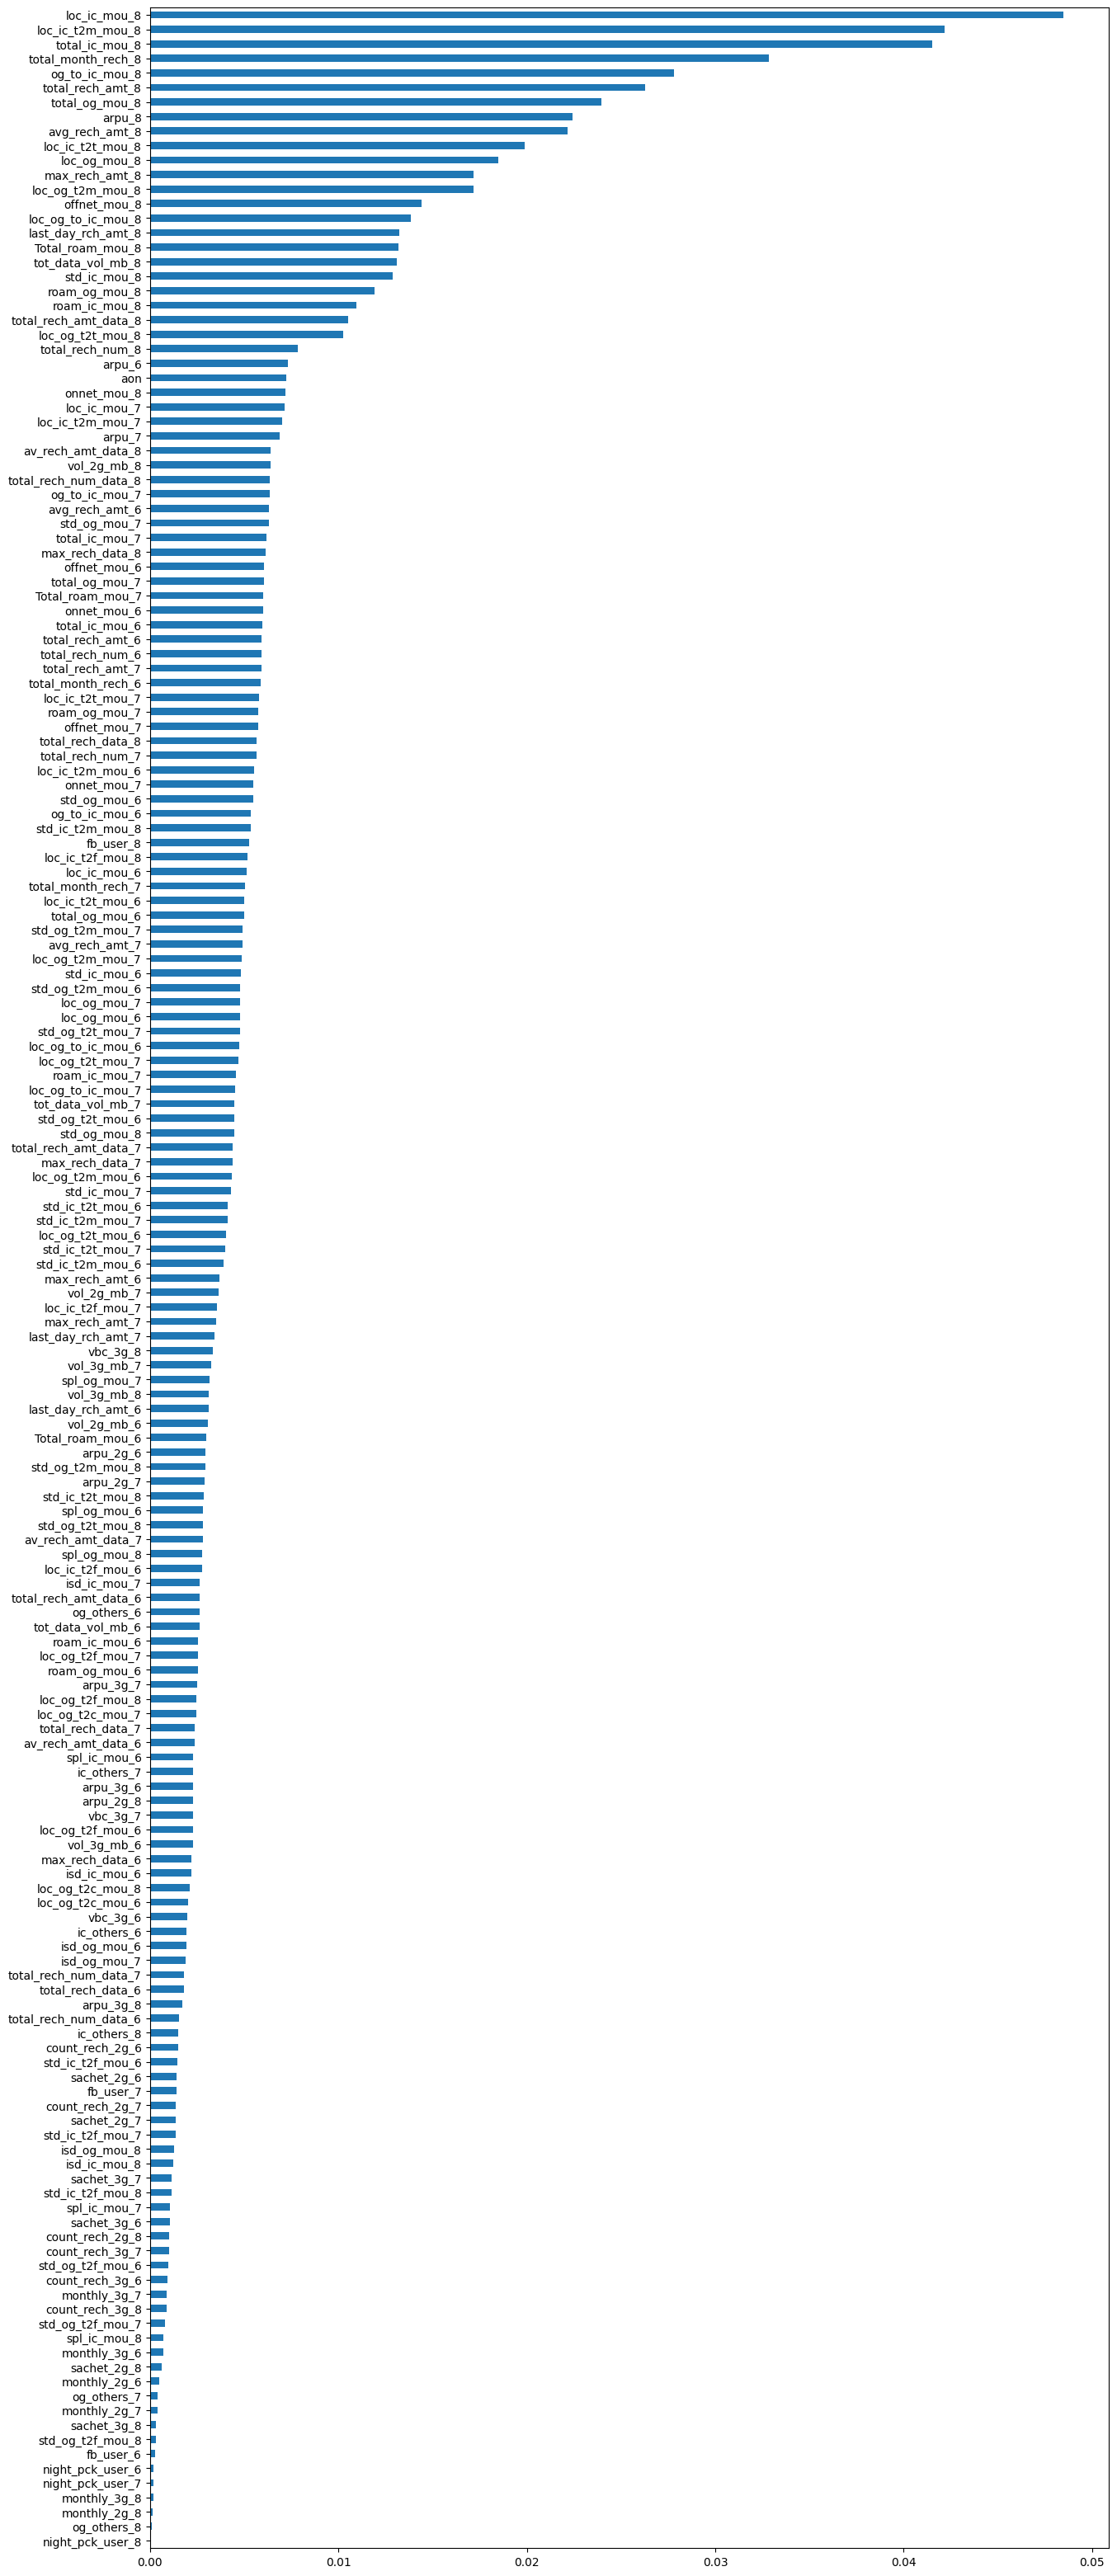

In [93]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf_m2.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

### **Inferences**

1. It is very evident that our most important features are from the 8th month. This goes in line with our understanding that users are thinking/considering to leave our network.
2. From EDA & feature importance we can also conclude that a trend-change is easily detectable for a user who might churn based on usage.
2. This help us to guide users for immediate action.
3. The top category of features which are important are  : 
    * MOU : Minutes of Usage of different types 
    * Recharge Amount of different types like total,avg,etc. This also relates to ARPU
    * Type of calls like STD/Roaming also are important features for the 8 month.
    
The above categories of features can be monitored  for a usage for every month. Any sudden drop in these is can be detected as an anomaly, alerting for possible case of churn. Whereby the business can offer lucarative offers based on the drop of the most used facility.

Strategy 1 : If there is a drop in STD MoU, cheaper STD plans can be offered.  
Strategy 2 : For drop in MoU, similar free MoU can be offered to hook the customer to the network.  
Strategy 3 : Minimu free usage of service of certain value can be offered if the customers ARPU is dropping.  